# Importing common libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy
import plotly.express as px
from pyjstat import pyjstat

## Data Set 1 - Earning/ Hours worked in Construction in Ireland

In [2]:
#JSON file format

!pip install pyjstat

In [3]:
request_url = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BDA01/JSON-stat/2.0/en'
# read json data
dataset = pyjstat.Dataset.read(request_url)

# write to pandas dataframe
df1 = dataset.write('dataframe')

In [231]:
df1.shape

(482, 4)

In [4]:
df1.head()

Type of Worker  Year  \
0  All manual employee grades  1969   
1  All manual employee grades  1969   
2  All manual employee grades  1969   
3  All manual employee grades  1970   
4  All manual employee grades  1970   

                                           Statistic  value  
0  Average Earnings per Hour in the Building and ...    NaN  
1  Average Earnings per Week in the Building and ...    NaN  
2  Average Hours Worked per Week in the Building ...    NaN  
3  Average Earnings per Hour in the Building and ...    NaN  
4  Average Earnings per Week in the Building and ...    NaN

In [5]:
#To determine the variables in the statistic column.

df1label = df1.groupby(by=['Statistic']).size()
print(df1label)

Statistic
Average Earnings per Hour in the Building and Construction Industry        360
Average Earnings per Week in the Building and Construction Industry        360
Average Hours Worked per Week in the Building and Construction Industry    360
dtype: int64


In [6]:
#Renaming the column as the white space is causing issues.

df1 = df1.rename(columns={'Type of Worker': 'Type_of_Worker'})

In [7]:
#Looking at the different variables in the Type_of_Work column

df1label = df1.groupby(by=['Type_of_Worker']).size()
print(df1label)

Type_of_Worker
All employees (clerical and operatives)    120
All manual employee grades                 120
Apprentices                                120
Clerical employees - female                120
Clerical employees - male                  120
Foremen and supervisors                    120
Skilled operatives                         120
Unskilled and semi-skilled - adults        120
Unskilled and semi-skilled - juveniles     120
dtype: int64


In [8]:
##Dropping the Average weekly earning rows from the dataframe as it already contains hours worked and hourly rate.

df1.drop(df1[df1["Statistic"]=="Average Earnings per Week in the Building and Construction Industry"].index, inplace=True)

In [9]:
df1.head()

Type_of_Worker  Year  \
0  All manual employee grades  1969   
2  All manual employee grades  1969   
3  All manual employee grades  1970   
5  All manual employee grades  1970   
6  All manual employee grades  1971   

                                           Statistic  value  
0  Average Earnings per Hour in the Building and ...    NaN  
2  Average Hours Worked per Week in the Building ...    NaN  
3  Average Earnings per Hour in the Building and ...    NaN  
5  Average Hours Worked per Week in the Building ...    NaN  
6  Average Earnings per Hour in the Building and ...    NaN

In [10]:
df1.dtypes

Type_of_Worker     object
Year               object
Statistic          object
value             float64
dtype: object

In [11]:
#Count the number of null values.

df1.isnull().sum()

Type_of_Worker      0
Year                0
Statistic           0
value             238
dtype: int64

Text(0, 0.5, 'Count')

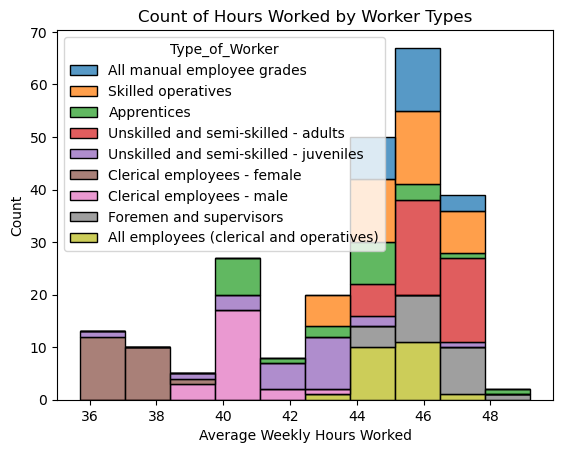

In [12]:
sns.histplot(data=df1[df1['Statistic'] == 'Average Hours Worked per Week in the Building and Construction Industry'], x='value', hue='Type_of_Worker', multiple='stack')

plt.title("Count of Hours Worked by Worker Types")
plt.xlabel("Average Weekly Hours Worked")
plt.ylabel("Count")

The above bar plot shows clearly which type of worker had more/less weekly hours. It is clear from the above plot that the clerical female employees account for most of the lowest values, joined by juvenile employees. the clerical employees in general, both male and female do not have average weekly hours above 48 hours. It can be seen there is a mix of values ranging from 40 to 48 hours for the apprentices as green can be seen in most areas above 40. Ref - https://realpython.com/python-statistics/

Text(0, 0.5, 'Count')

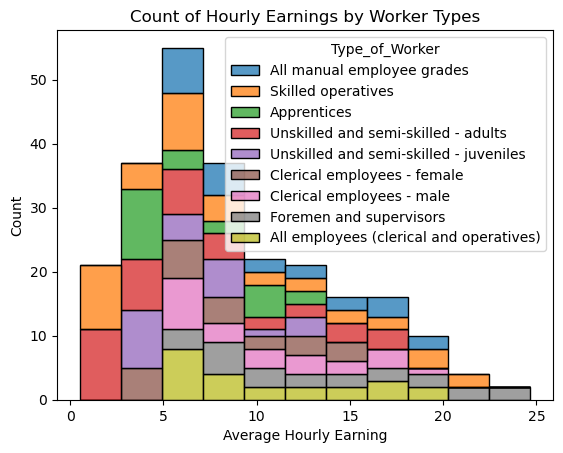

In [13]:
sns.histplot(data=df1[df1['Statistic'] == 'Average Earnings per Hour in the Building and Construction Industry'], x='value', hue='Type_of_Worker', multiple='stack')

plt.title("Count of Hourly Earnings by Worker Types")
plt.xlabel("Average Hourly Earning")
plt.ylabel("Count")

From the above plot, we can say that the average hourly earnings are much more spread/ inconsistent that that of the hours worked. There is a large spread for most categories, especially that of foremen (5 to 25 euro an hour) and clerical male employees. #REF-https://realpython.com/python-statistics/

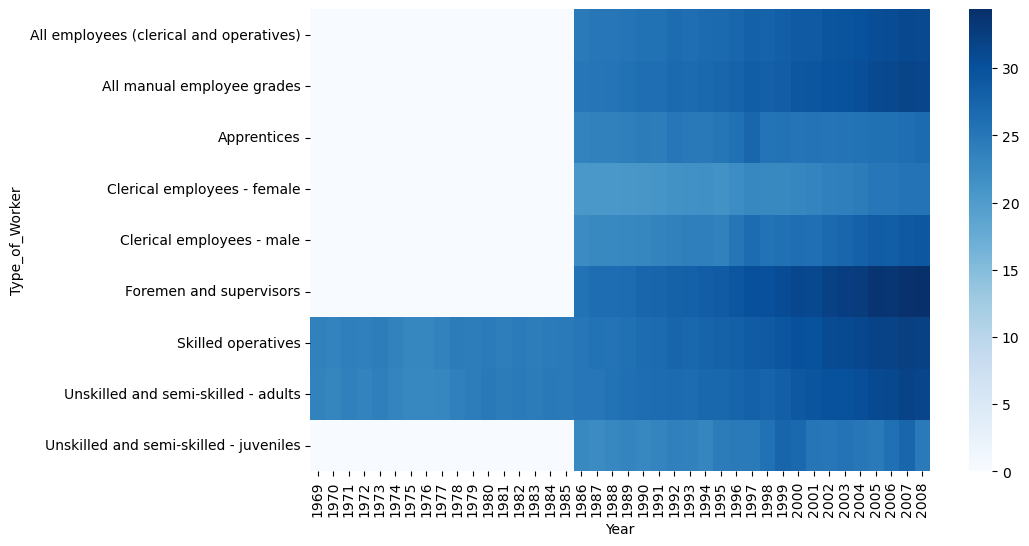

In [14]:
def feature_interactions(df1,feature1, feature2,continuous_col):
    group = df1.groupby([feature1, feature2], as_index=False)['value'].agg({'Average Earnings per Hour in the Building and Construction Industry': 'mean', 'hours_worked': lambda x: x.iloc[1]-x.iloc[0]}).reset_index(drop=True)
    
    pivot = group.pivot(index=feature1, columns=feature2, values=continuous_col)
    pivot.fillna(0, inplace=True)
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot,cmap='Blues')
    plt.show()

feature_interactions(df1,'Type_of_Worker','Year','Average Earnings per Hour in the Building and Construction Industry')

The large amounts of white space can be explained by the null values present in the data set. The colour blue was used as it allows the lighetr shades to be seen much easier. These lighter shades represent the lower values. This can be clearly seen for the female clerical employees, specially in the earlier years. it can be said in gnereal that most types of employees had increasing wages as the years increase.

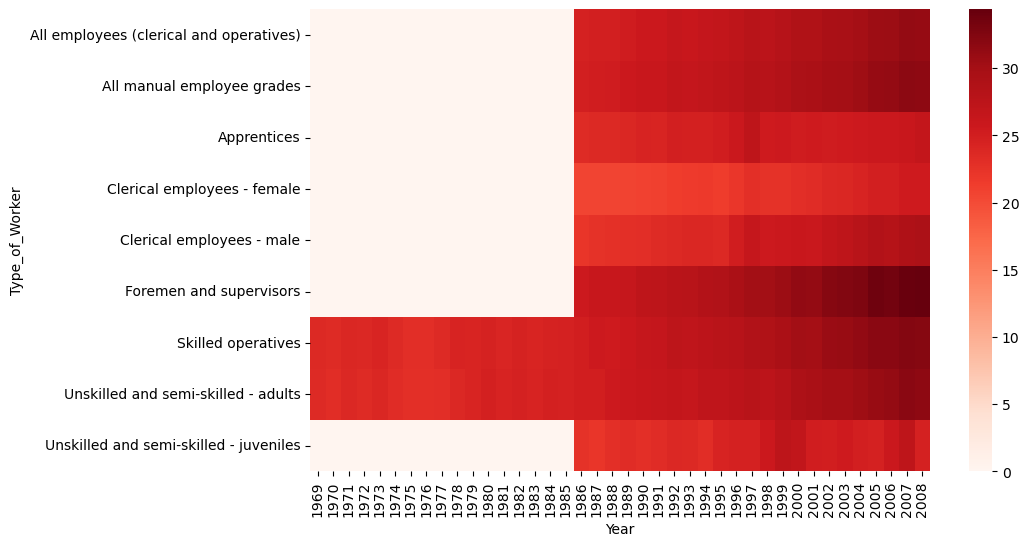

In [15]:
def feature_interactions(df1,feature1, feature2,continuous_col):
    #group = df1.groupby([feature1,feature2],as_index=False)[continuous_col].mean().reset_index(drop=True)
    group = df1.groupby([feature1, feature2], as_index=False)['value'].agg({'Average Hours Worked per Week in the Building and Construction Industry': 'mean', 'hourly_wage': lambda x: x.iloc[1]-x.iloc[0]}).reset_index(drop=True)
    
    pivot = group.pivot(index=feature1, columns=feature2, values=continuous_col)
    pivot.fillna(0, inplace=True)
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot,cmap='Reds')
    plt.show()

feature_interactions(df1,'Type_of_Worker','Year','Average Hours Worked per Week in the Building and Construction Industry')

Skew : -0.08


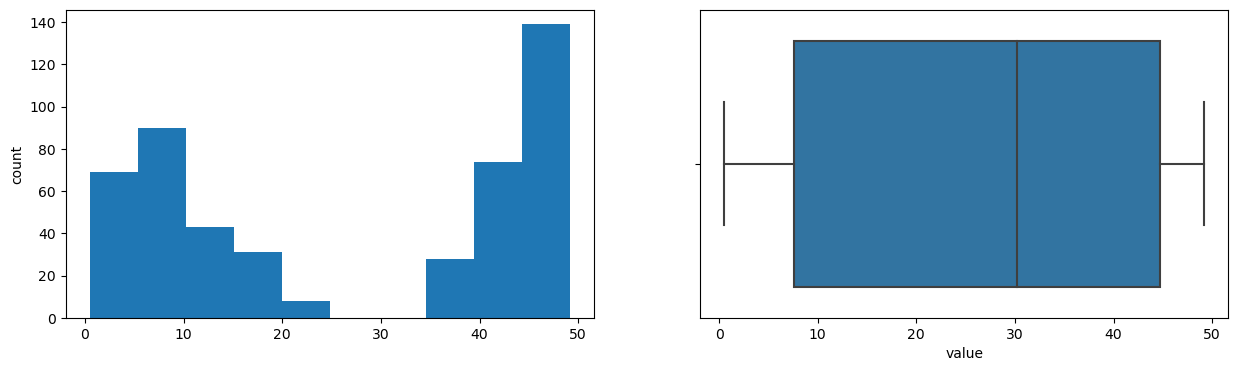

In [16]:
print('Skew :', round(df1['value'].skew(), 2))
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df1['value'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['value'])
plt.show()

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


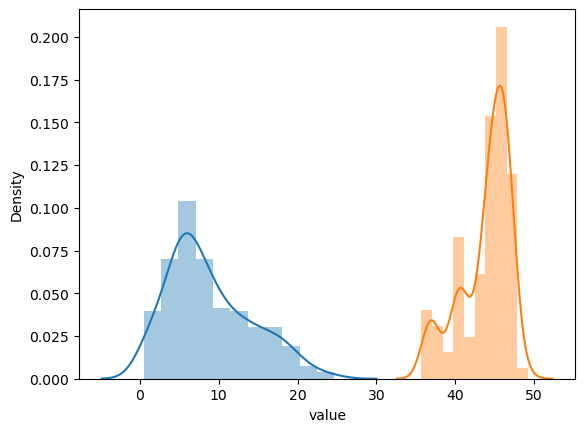

In [17]:
data = df1['value']
categories = df1['Statistic']

for category in categories.unique():
    sns.distplot(data[categories == category], hist=True, kde=True, label=category)

In [175]:
!conda config --add channels conda-forge
!conda install -c conda-forge missingno

#ref- https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/osx-64::bottleneck==1.3.5=py39h67323c0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - defaults/osx-64::datashape==0.5.4=py39hecd8cb5_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::numexpr==2.8.3=py39h2e5f0a9_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39h0f85e6e_1
  - defaults/osx-64::h5py==3.7.0=py39h4a1dd59_0
  - defaults/osx-64::pywavelets==1.3.0=py39hca72f7f_0
  - defaults/osx-64::scikit-learn-intelex==2021.6.0=py39hecd8cb5_0
  - defaults/osx-64::numpy==1.21.5=py39h2e5f0a9_3
  - defaults/osx-64::datashader==0.14.1=py39hecd8cb5_0
  - defaults/osx-64::anaconda==2022.10=py39_0
  - defaults/osx-64::matplotlib==3.5.2=py

In [19]:
import missingno as msno

<AxesSubplot:>

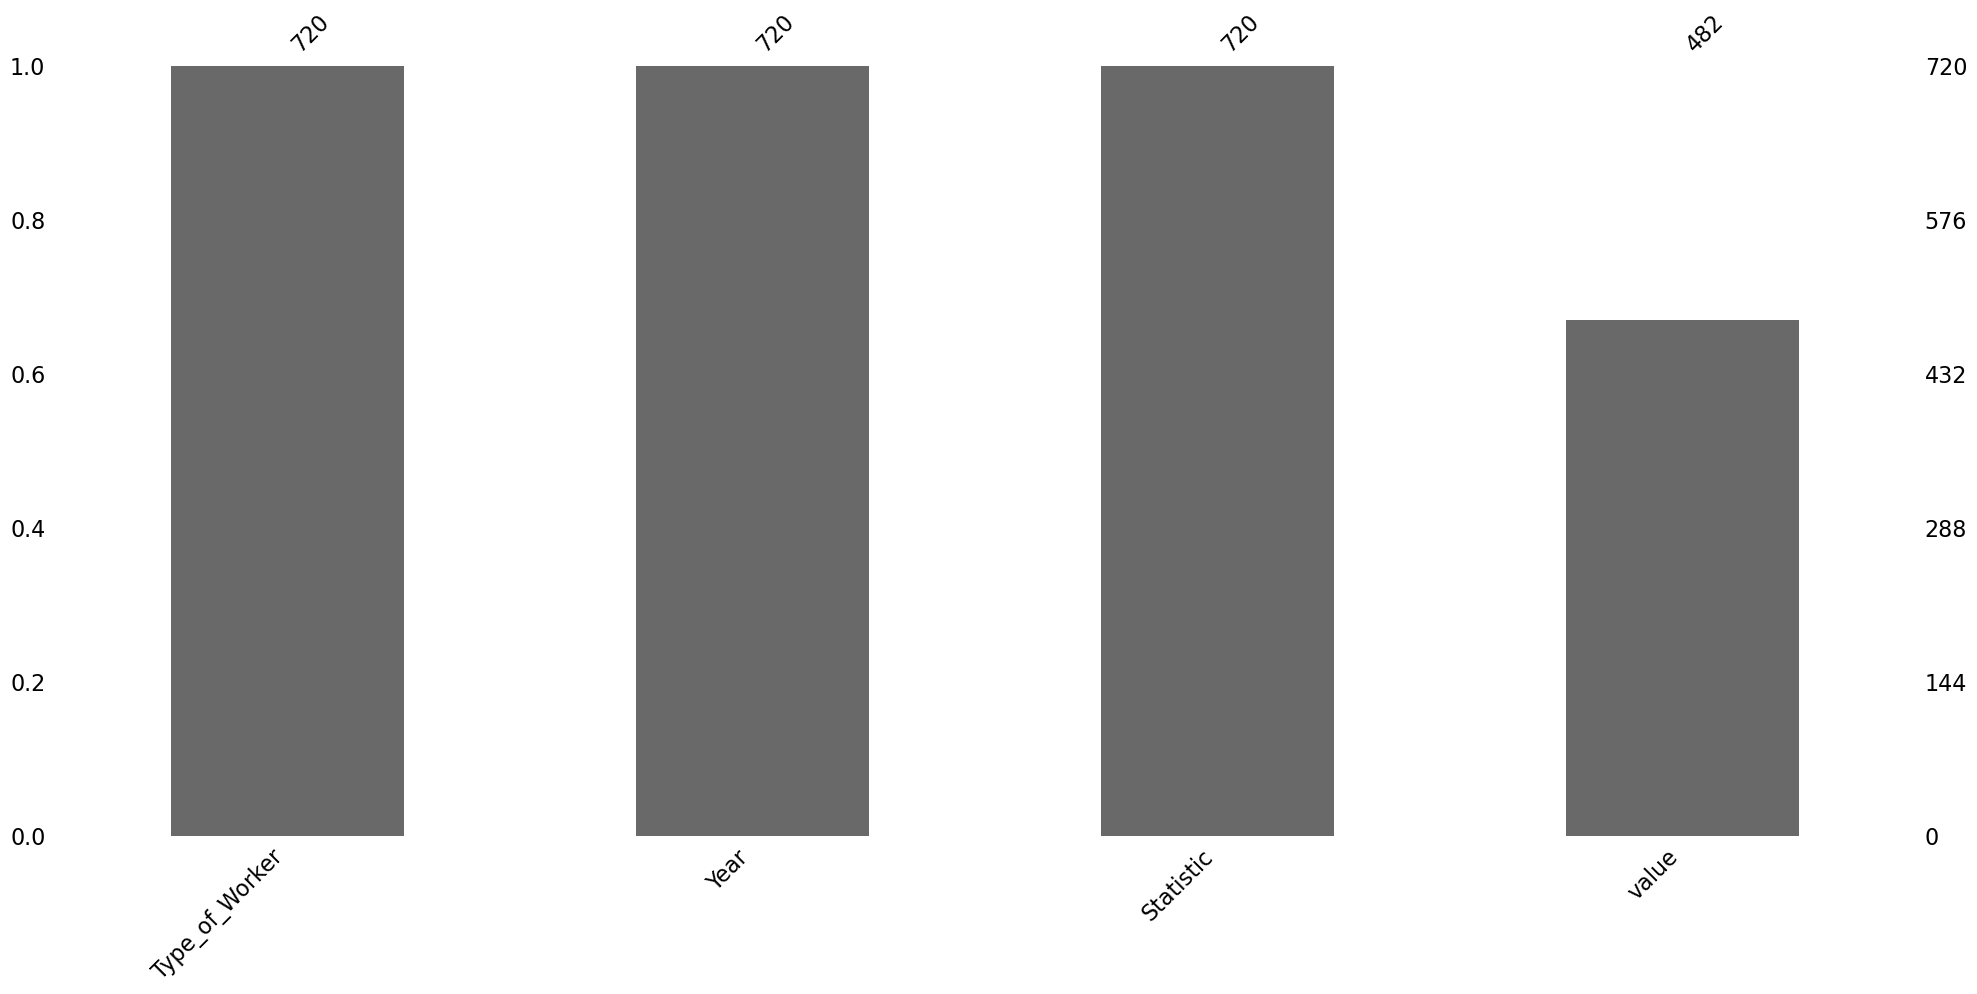

In [20]:
#To visualise missing values.All missing values are in the 'value' column

msno.bar(df1)

<AxesSubplot:>

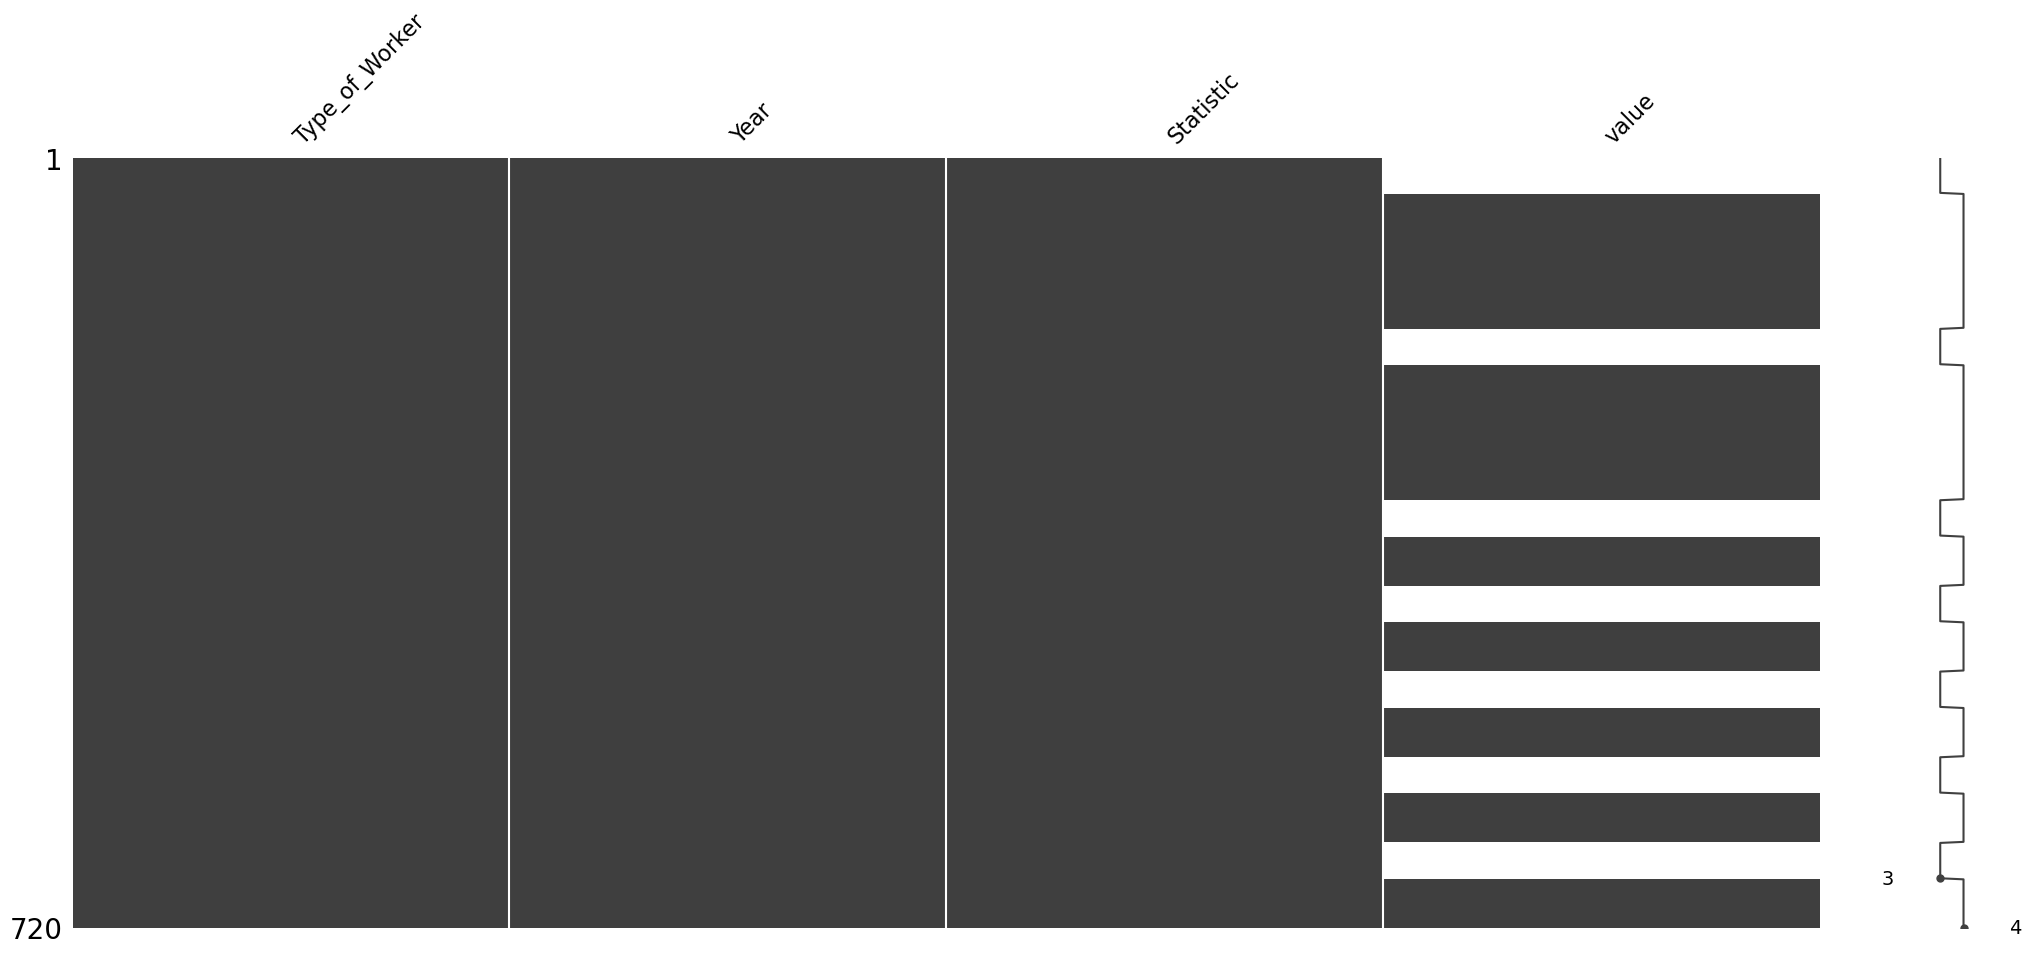

In [21]:
## Can see there is no pattern to the missing data.

msno.matrix(df1)

In [22]:
#There are a number of null rows. Drop these rows. 

df1.dropna(inplace=True)

In [23]:
df1.isnull().sum()

Type_of_Worker    0
Year              0
Statistic         0
value             0
dtype: int64

In [24]:
df1.dtypes

Type_of_Worker     object
Year               object
Statistic          object
value             float64
dtype: object

In [25]:
#Need to convert year to integer

df1['Year'] = df1['Year'].astype(int)

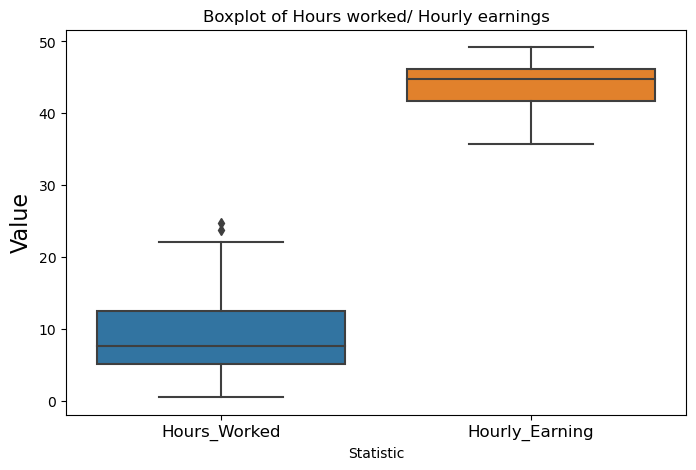

In [26]:
# Using seaborn (sns) to create a box plot.
fig, ax = plt.subplots(figsize=(8, 5))

#Naming the labels
labels = ['Hours_Worked', 'Hourly_Earning'] 

sns.boxplot(x='Statistic', y='value', data=df1, ax=ax).set(title='Boxplot of Hours worked/ Hourly earnings')

# rotate the x-axis labels
ax.set_xticklabels(labels, fontsize=12)

#Naming the y label axis
ax.set_ylabel('Value', fontsize=16)

plt.show()

The boxplot shows there are a small number of outliers for the average hours worked and no outliers for the average hourly earnings.

In [27]:
df1.describe()

Year       value
count   482.000000  482.000000
mean   1994.178423   26.324295
std       9.478135   18.047498
min    1969.000000    0.500000
25%    1988.000000    7.577500
50%    1995.000000   30.190000
75%    2002.000000   44.700000
max    2008.000000   49.200000

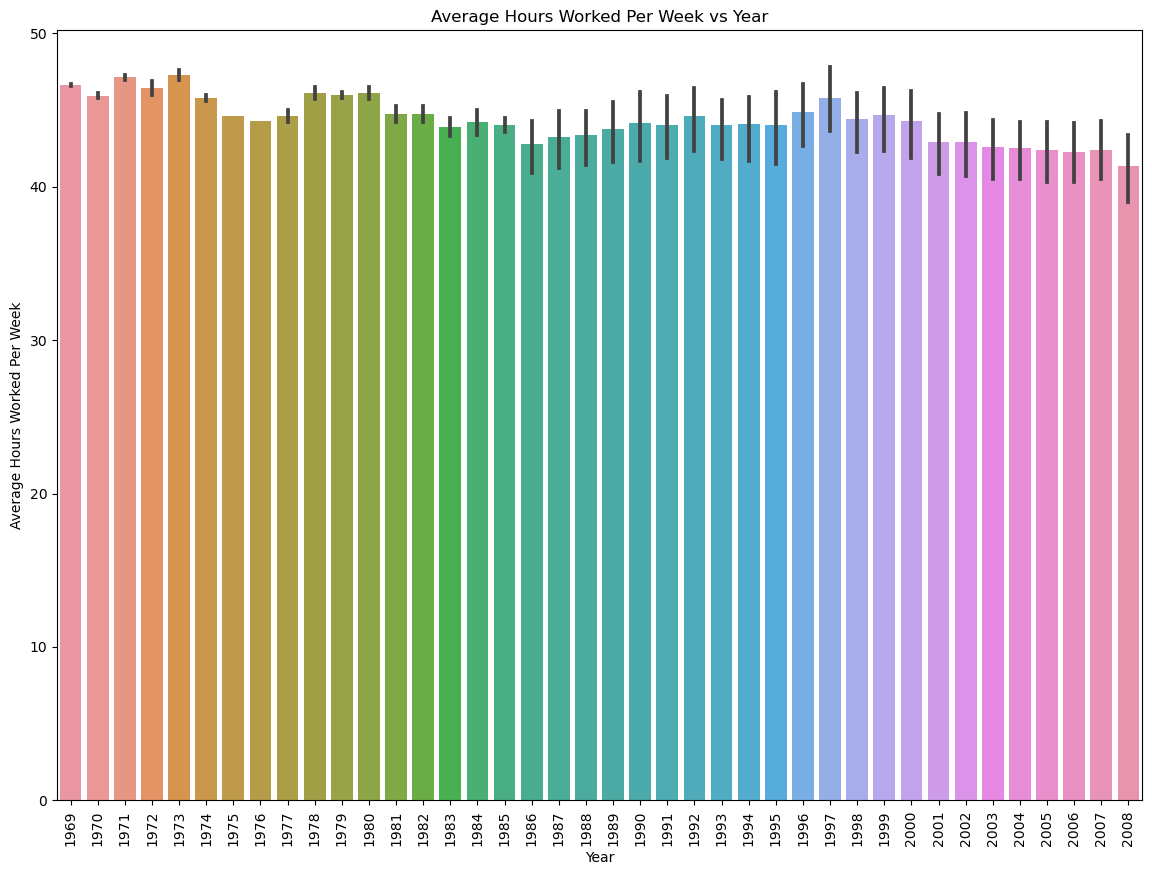

In [28]:
#Year is not showing in chronoligical order - specify sort first.

df1 = df1.sort_values('Year')

#Plot the graph

plt.figure(figsize=(14, 10))
ax = sns.barplot(x="Year", y="value", data=df1[df1["Statistic"]=="Average Hours Worked per Week in the Building and Construction Industry"])
plt.ylabel("Average Hours Worked Per Week")
plt.title('Average Hours Worked Per Week vs Year')
plt.xticks(rotation=90);

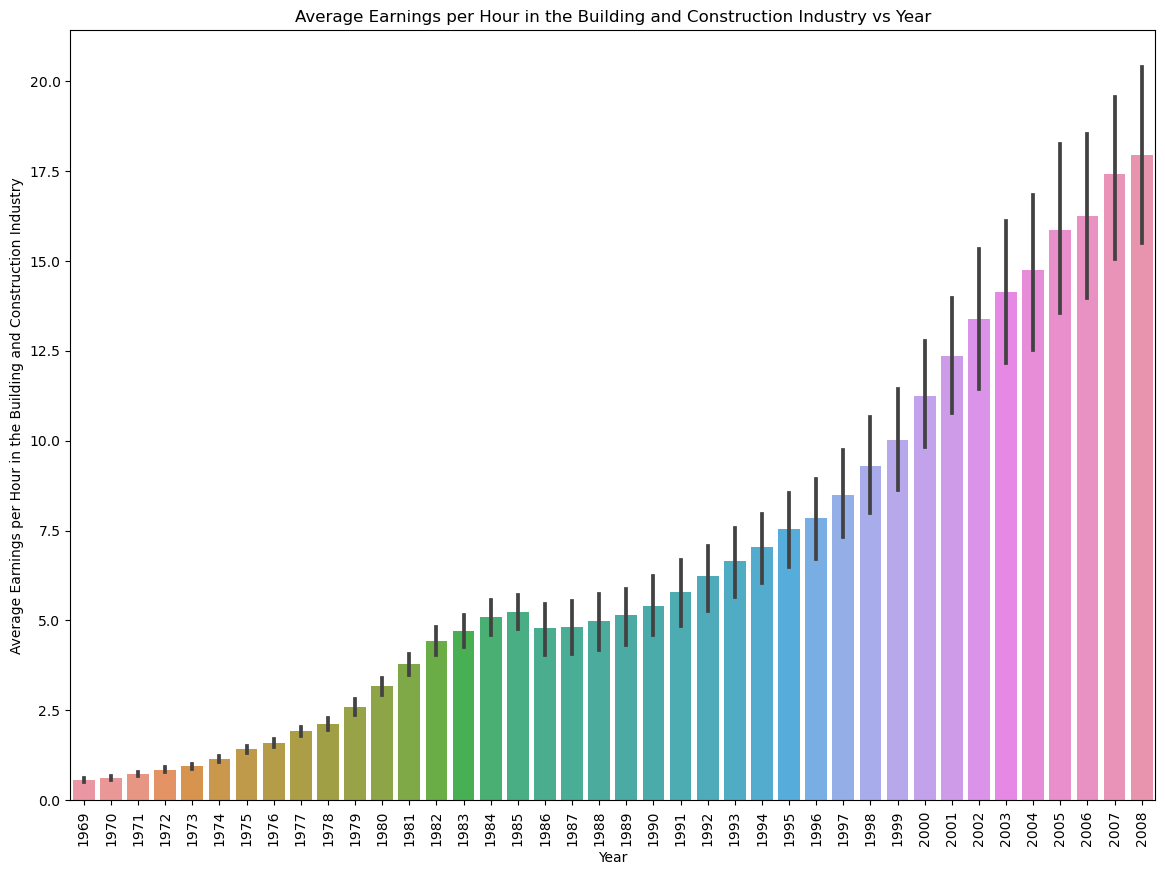

In [29]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(x="Year", y="value", data=df1[df1["Statistic"]=="Average Earnings per Hour in the Building and Construction Industry"])
plt.ylabel("Average Earnings per Hour in the Building and Construction Industry")
plt.title('Average Earnings per Hour in the Building and Construction Industry vs Year')
plt.xticks(rotation=90);

The bar plot is much more effective in visualising the increase in hourly earnings. Although a scatterplot could show the increase for the individual type of worker by using the 'hue' feature, it appears messy as there are 8 different grades of employees so there are a number of different coloured dots. The error bars displayed by the sns.barplot are a useful insight. We can see the error bars are lower for the earlier years, this can be accounted for by the fact the data available for the early years was mainly based on unkilled and semi skilled adults and skilled operatives, therefore there wouldnt have been as much of a spread in values as there are less categories. 

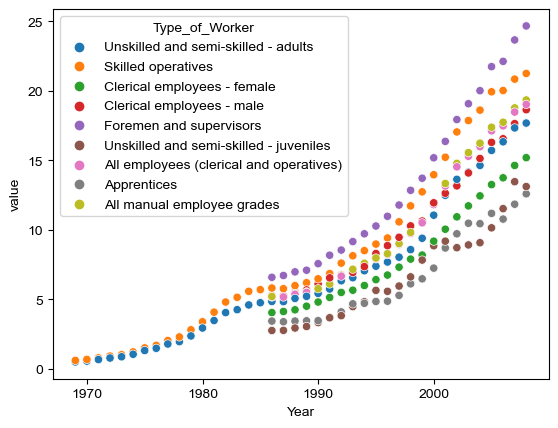

In [30]:
df1_filtered = df1[df1['Statistic'] == 'Average Earnings per Hour in the Building and Construction Industry']
sns.scatterplot(data=df1_filtered, x='Year', y='value', hue='Type_of_Worker')
sns.set(rc={'figure.figsize':(12,10),'axes.labelsize': 18,'xtick.labelsize': 16, 'ytick.labelsize': 16})

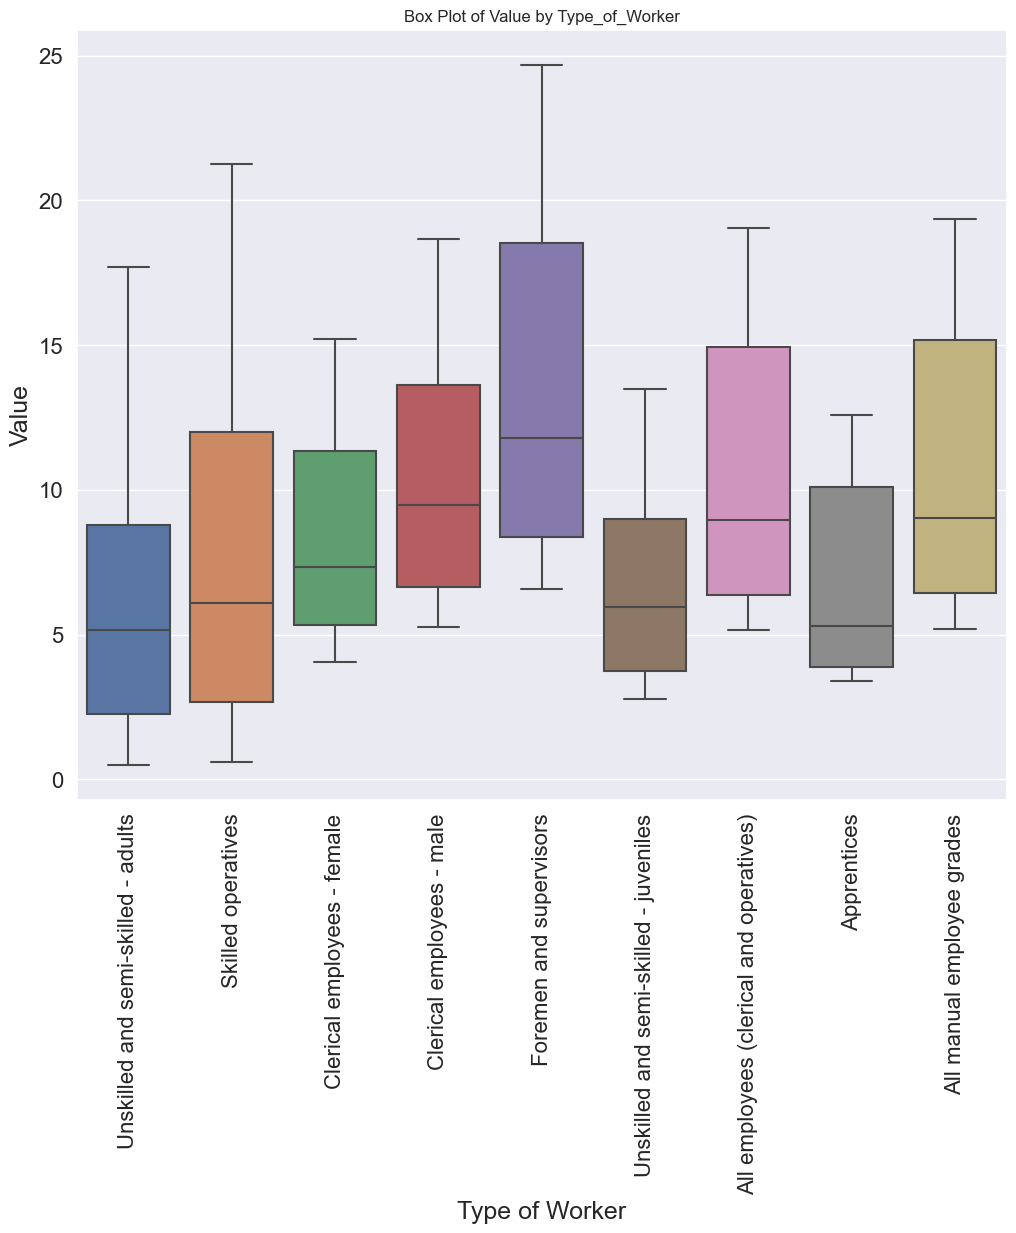

In [31]:
sns.boxplot(data=df1[df1['Statistic']=='Average Earnings per Hour in the Building and Construction Industry'], x='Type_of_Worker', y='value')
plt.xlabel('Type of Worker')
plt.ylabel('Value')
plt.title('Box Plot of Value by Type_of_Worker')
plt.xticks(rotation=90)
plt.show()

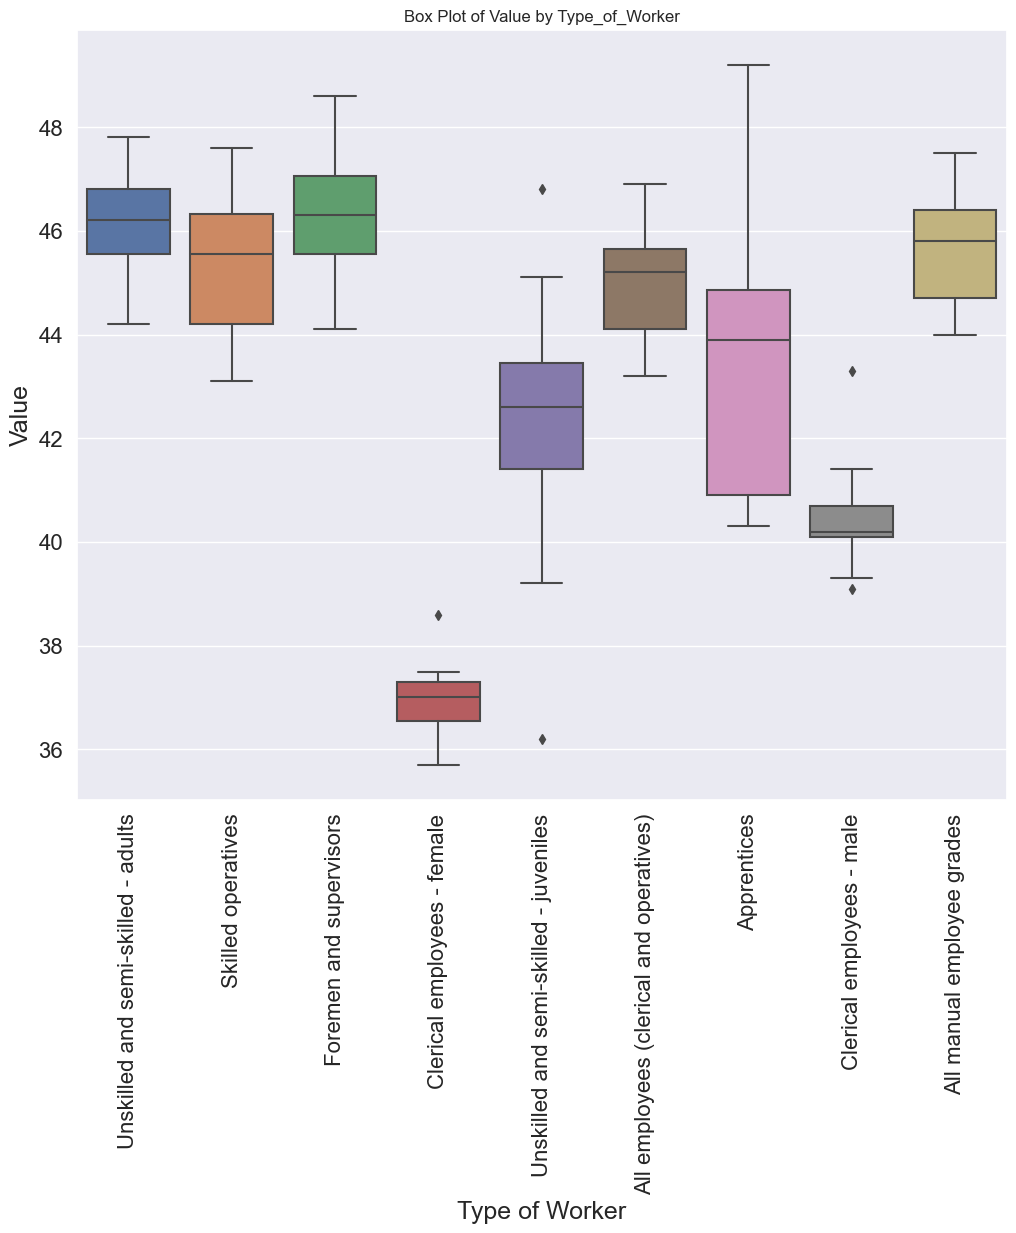

In [32]:
sns.boxplot(data=df1[df1['Statistic']=='Average Hours Worked per Week in the Building and Construction Industry'], x='Type_of_Worker', y='value')
plt.xlabel('Type of Worker')
plt.ylabel('Value')
plt.title('Box Plot of Value by Type_of_Worker')
plt.xticks(rotation=90)
plt.show()

We can see there are a small number of outliers present for female/male clerical employees and for unskilled and semi skilled juvenilles. 

## df2 Production Index for Construction Europe

In [33]:
#reverts to the tab - file is .tsv#
#The pipe (|) allows multiple seperators 
#\t seperating tabs and ',' seperating commas as are in the column 1 

df2=pd.read_csv("Production_Europe.tsv",sep="\t|,", engine='python')

Default parser for read csv does not support seperators greater than one character. Specifying engine=python above so multiple seperators can be used. Required as file as file contains tab and comma delimiters.  

In [34]:
#dataset has 608 rows and 48 columns
df2.shape

(608, 48)

In [35]:
df2.head()

indic_bt nace_r2 s_adj unit geo\time    2022     2021     2020     2019   \
0     PROD   B-D_F    CA  I15       AT   128.4    120.7    109.3    115.7    
1     PROD   B-D_F    CA  I15       BE  121.0 s  121.4 s  106.2 s  111.4 s   
2     PROD   B-D_F    CA  I15       BG  119.5 s  107.5 s   98.6 s  105.1 s   
3     PROD   B-D_F    CA  I15       CH   124.6    119.2    110.5    114.2    
4     PROD   B-D_F    CA  I15       CY  148.6 s  150.5 s  142.3 s  153.1 s   

     2018   ... 1989  1988  1987  1986  1985  1984  1983  1982  1981  1980  
0   114.2   ...    :     :     :     :     :     :     :     :     :     :  
1  107.4 s  ...    :     :     :     :     :     :     :     :     :     :  
2  104.0 s  ...    :     :     :     :     :     :     :     :     :     :  
3   110.4   ...    :     :     :     :     :     :     :     :     :     :  
4  142.9 s  ...    :     :     :     :     :     :     :     :     :     :  

[5 rows x 48 columns]

In [36]:
#Dropping columns which have no relevance.

df2=df2.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

In [37]:
#Want to keep unit and geo\time columns the same. Melt the rest of the year columns

df2=pd.melt(df2, id_vars=["unit","geo\\time"], var_name="Year",
          value_name="Production")

In [38]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
#Revisit.

df2['Production'] = df2['Production'].str.replace('[^0-9.]+', '', regex=True)

Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26144 entries, 0 to 26143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unit        26144 non-null  object
 1   geo\time    26144 non-null  object
 2   Year        26144 non-null  object
 3   Production  26144 non-null  object
dtypes: object(4)
memory usage: 817.1+ KB


In [40]:
df2.astype("object").describe()

unit geo\time   Year Production
count   26144    26144  26144      26144
unique      3       40     43       1970
top       I15       AT  2022            
freq    11524      774    608      13146

In [41]:
df2.dtypes

unit          object
geo\time      object
Year          object
Production    object
dtype: object

In [42]:
#When you melt a numerical column it turns to an object/string and you need to change back to integer. 

df2[["Year","Production"]]=df2[["Year","Production"]].apply(pd.to_numeric)

In [43]:
df2.dtypes

unit           object
geo\time       object
Year            int64
Production    float64
dtype: object

In [44]:
#Need to remove all white space to address the unavailable values.
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df2 = df2.replace(':', np.nan)

#Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [45]:
df2.head()

unit geo\time  Year  Production
0  I15       AT  2022       128.4
1  I15       BE  2022       121.0
2  I15       BG  2022       119.5
3  I15       CH  2022       124.6
4  I15       CY  2022       148.6

[Text(0.5, 0, 'Production'),
 Text(0, 0.5, 'Production'),
 Text(0.5, 1.0, 'Production Histogram')]

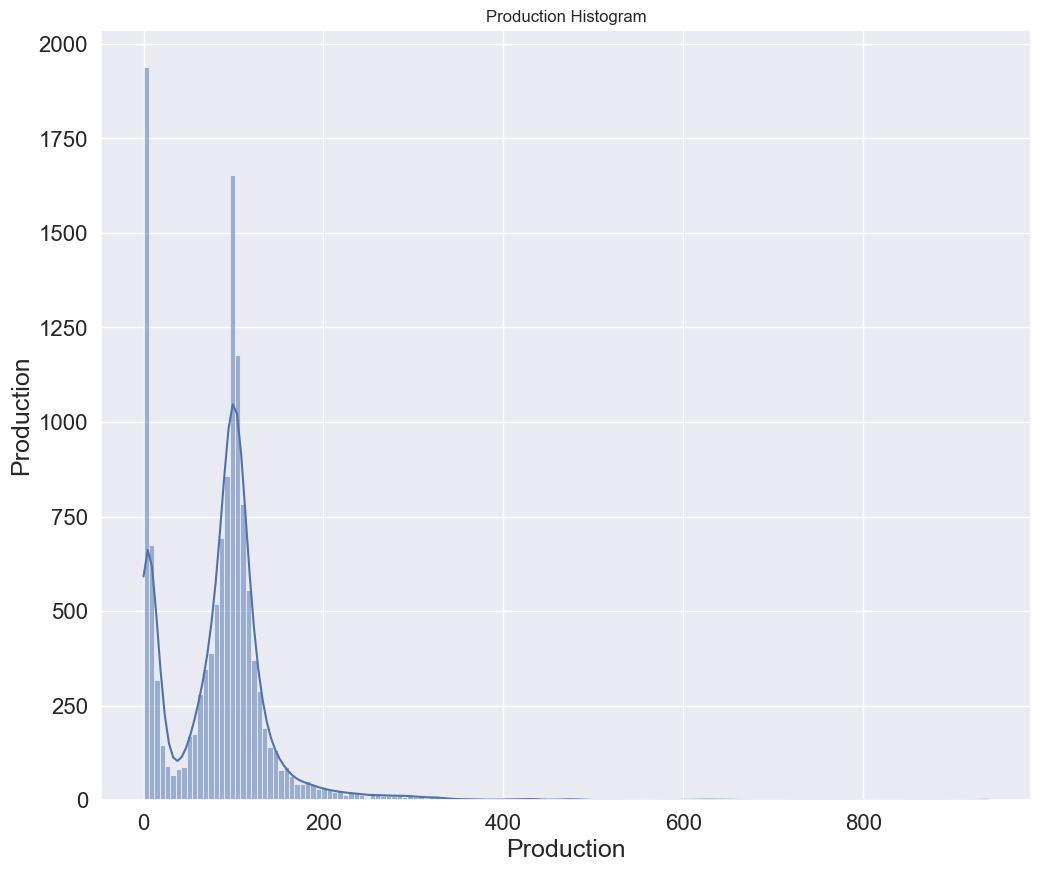

In [46]:
ax = sns.histplot(df2.Production, kde=True)
ax.set(xlabel='Production', ylabel='Production', title ='Production Histogram')

From the histplot we can see the data is not normally distributed.

In [47]:
df2.dropna(inplace=True)

In [48]:
df2

unit geo\time  Year  Production
0         I15       AT  2022       128.4
1         I15       BE  2022       121.0
2         I15       BG  2022       119.5
3         I15       CH  2022       124.6
4         I15       CY  2022       148.6
...       ...      ...   ...         ...
24338     I15       IE  1982         7.9
24370  PCH_SM       IE  1982         0.0
24946     I15       IE  1981         7.9
24978  PCH_SM       IE  1981         5.3
25554     I15       IE  1980         7.5

[12998 rows x 4 columns]

In [49]:
#Check the different variables and the number of values for each in the geo\\time column.

df2label = df2.groupby(by=['geo\\time']).size()
print(df2label)

geo\time
AL            65
AT           452
BA            79
BE           380
BG           380
CH           380
CY           374
CZ           380
DE           542
DK           380
EA19         267
EA20         200
EE           370
EL           374
ES           306
EU27_2020    208
EU28         191
FI           464
FR           560
HR           384
HU           380
IE           391
IT           222
LT           416
LU           172
LV           380
ME           312
MK           211
MT           172
NL           172
NO           387
PL           380
PT           380
RO           368
RS           104
SE           470
SI           384
SK           380
TR           171
UK           410
dtype: int64


In [ ]:
!pip install pycountry
import pycountry

In [189]:
#choropleth does not work with apha 2 codes.
#need to change these to alpha 3

# Using pycountry package, create a dictionary named 'codes' listing all alpha codes.
codes = {c.alpha_2: c.alpha_3 for c in pycountry.countries}

names = {c.alpha_3: c.name for c in pycountry.countries}

# map the alpha 2 codes to alpha 3 for df7m
df2["geo\\time"] = df2["geo\\time"].map(codes)

#to allow country names to show when hovering
df2["CountryName"] = df2["geo\\time"].map(names)

In [190]:
codes

{'AW': 'ABW',
 'AF': 'AFG',
 'AO': 'AGO',
 'AI': 'AIA',
 'AX': 'ALA',
 'AL': 'ALB',
 'AD': 'AND',
 'AE': 'ARE',
 'AR': 'ARG',
 'AM': 'ARM',
 'AS': 'ASM',
 'AQ': 'ATA',
 'TF': 'ATF',
 'AG': 'ATG',
 'AU': 'AUS',
 'AT': 'AUT',
 'AZ': 'AZE',
 'BI': 'BDI',
 'BE': 'BEL',
 'BJ': 'BEN',
 'BQ': 'BES',
 'BF': 'BFA',
 'BD': 'BGD',
 'BG': 'BGR',
 'BH': 'BHR',
 'BS': 'BHS',
 'BA': 'BIH',
 'BL': 'BLM',
 'BY': 'BLR',
 'BZ': 'BLZ',
 'BM': 'BMU',
 'BO': 'BOL',
 'BR': 'BRA',
 'BB': 'BRB',
 'BN': 'BRN',
 'BT': 'BTN',
 'BV': 'BVT',
 'BW': 'BWA',
 'CF': 'CAF',
 'CA': 'CAN',
 'CC': 'CCK',
 'CH': 'CHE',
 'CL': 'CHL',
 'CN': 'CHN',
 'CI': 'CIV',
 'CM': 'CMR',
 'CD': 'COD',
 'CG': 'COG',
 'CK': 'COK',
 'CO': 'COL',
 'KM': 'COM',
 'CV': 'CPV',
 'CR': 'CRI',
 'CU': 'CUB',
 'CW': 'CUW',
 'CX': 'CXR',
 'KY': 'CYM',
 'CY': 'CYP',
 'CZ': 'CZE',
 'DE': 'DEU',
 'DJ': 'DJI',
 'DM': 'DMA',
 'DK': 'DNK',
 'DO': 'DOM',
 'DZ': 'DZA',
 'EC': 'ECU',
 'EG': 'EGY',
 'ER': 'ERI',
 'EH': 'ESH',
 'ES': 'ESP',
 'EE': 'EST',
 'ET':

In [192]:
fig=px.choropleth(df2,
                  locations="geo\\time",
                  color="Production",
                  hover_name="CountryName",
                  animation_frame="Year",
                  color_continuous_scale=px.colors.sequential.Rainbow,
                  )

fig.update_layout(
title_text="Construction Production Index Europe",
geo_scope='europe',
geo = dict(projection={"type":"natural earth"}))

fig.show()

Text(0.5, 1.0, 'Boxplot of Production Index Europe')

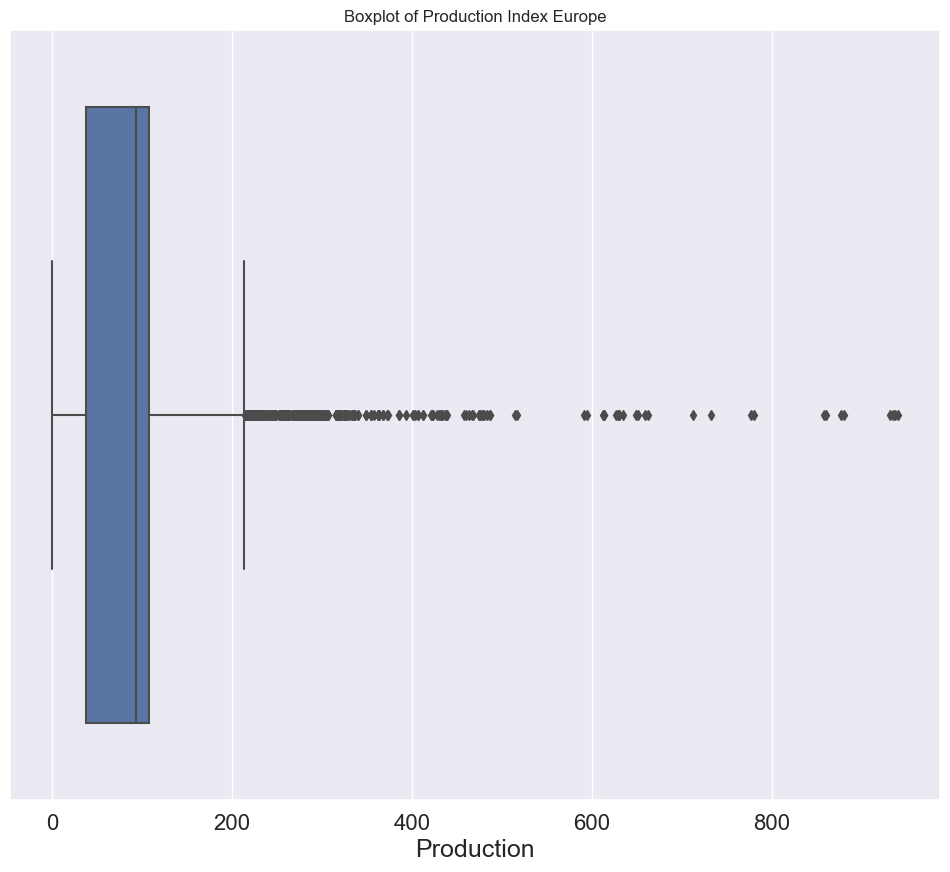

In [194]:
sns.boxplot(x=df2["Production"])
plt.title("Boxplot of Production Index Europe")

From the above box plot we can see there is a number of outliers. To deal with the outliers we can use Winzorization.

### Winzorization

In [51]:
from scipy.stats.mstats import winsorize

Text(0.5, 1.0, 'winsorized_Production')

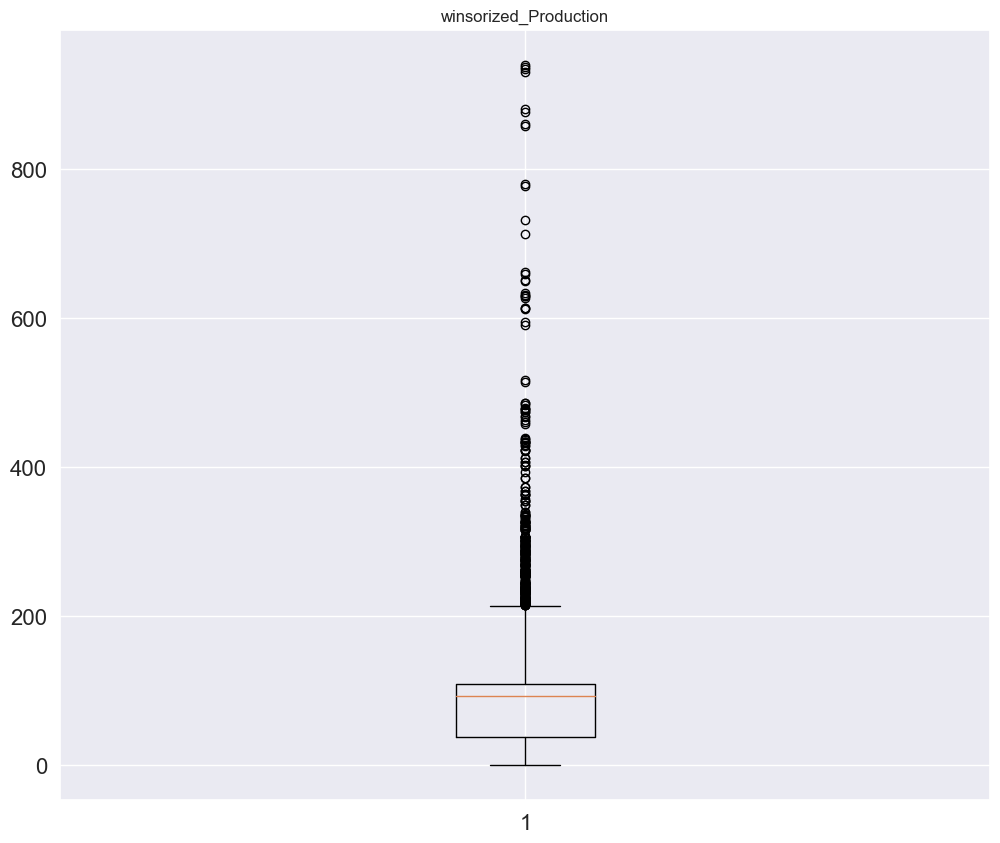

In [52]:
winsorized_Production = winsorize(df2['Production'],(0.01,0))
plt.boxplot(winsorized_Production)
plt.title("winsorized_Production")

In [176]:
# Store the updated values of the columns into already existed dataframe
df2['Production'] = winsorized_Production

In [177]:
# Display the columns that have an 'Object' datatype
df2.describe(include = 'O')

unit geo\time
count   12998    12998
unique      3       40
top       I15       FR
freq     6212      560

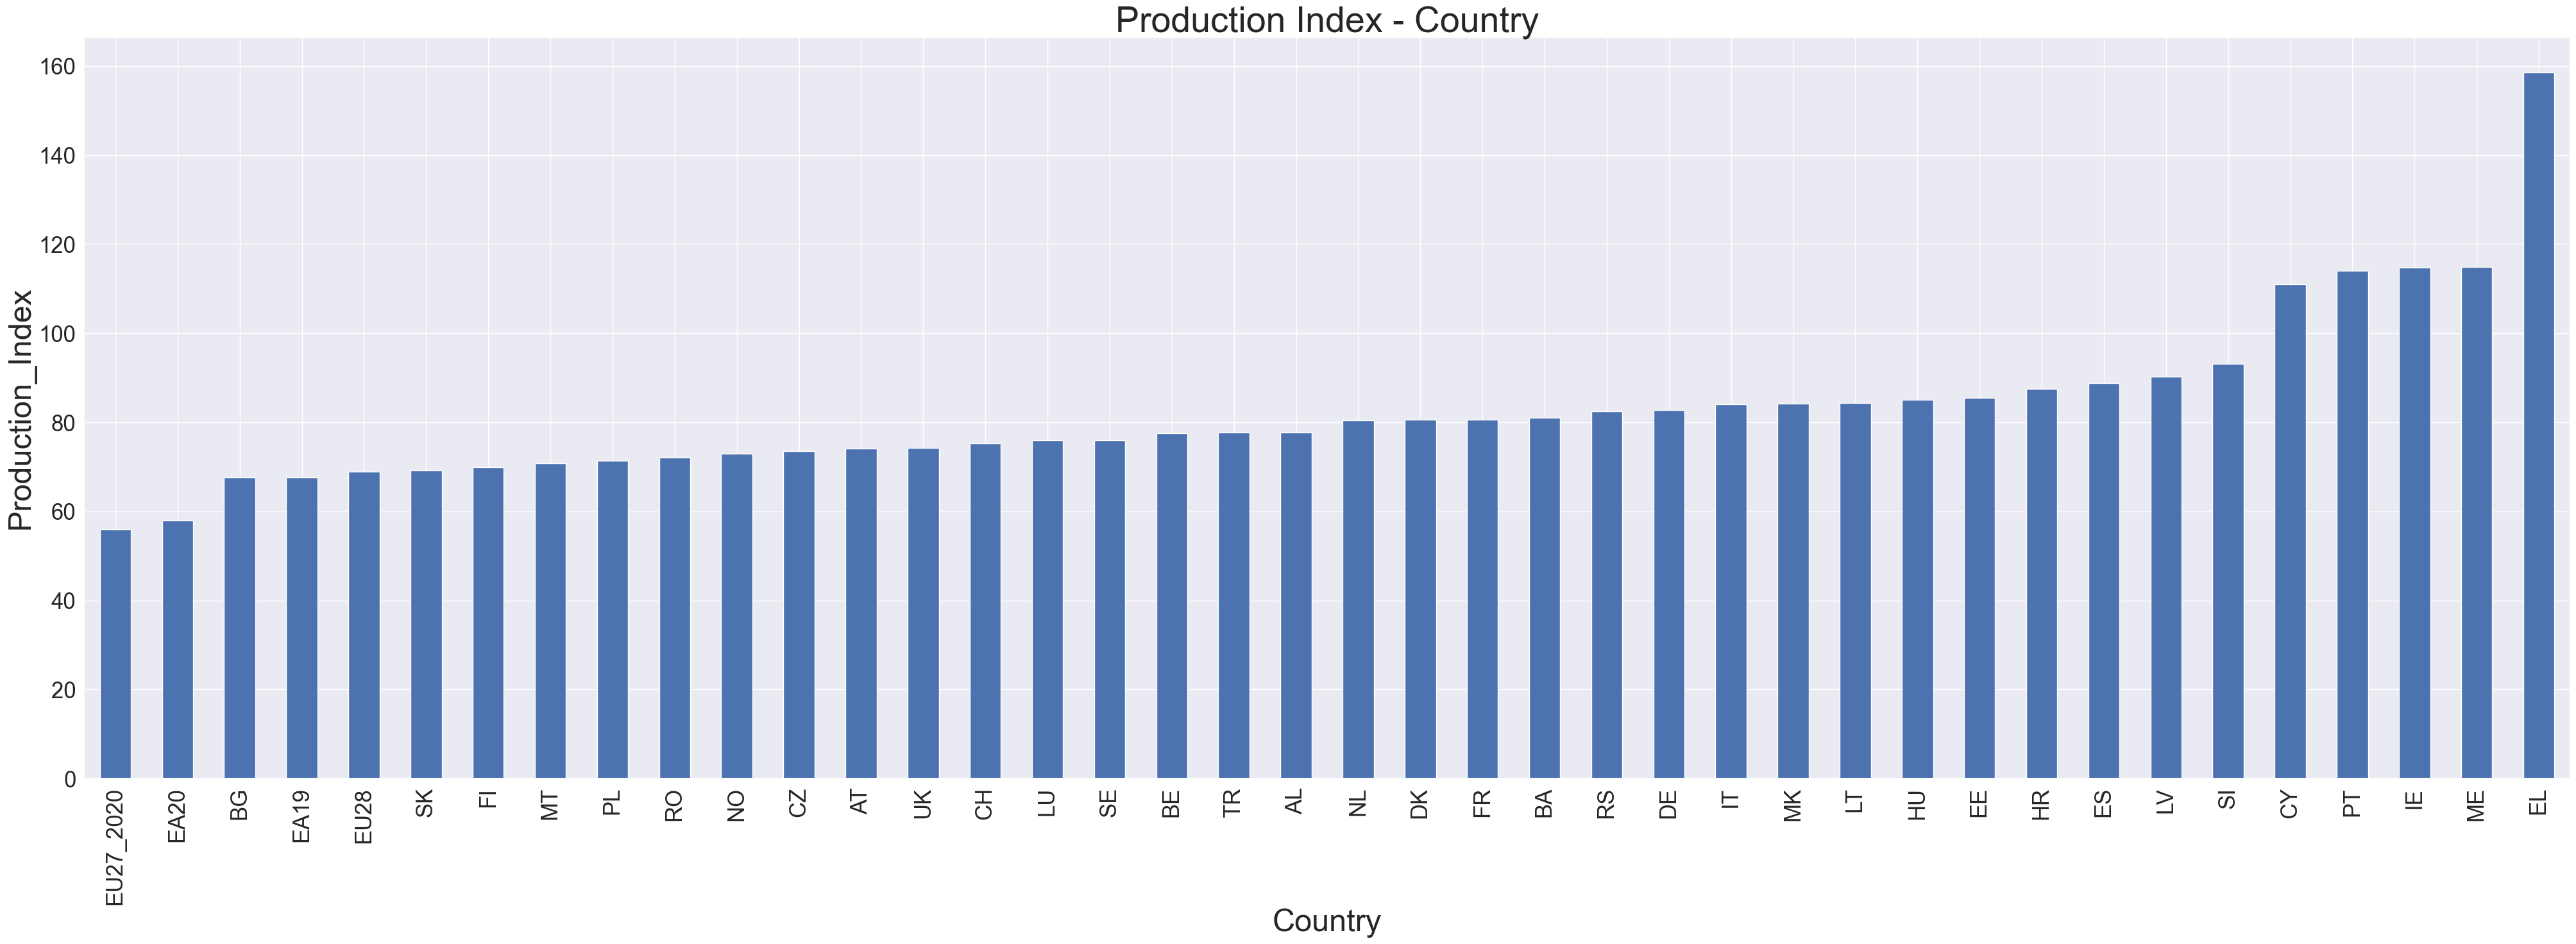

In [186]:
country = df2.groupby('geo\\time')['Production'].mean().sort_values(ascending=True)
country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Production Index - Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Production_Index",fontsize=35)
plt.show()

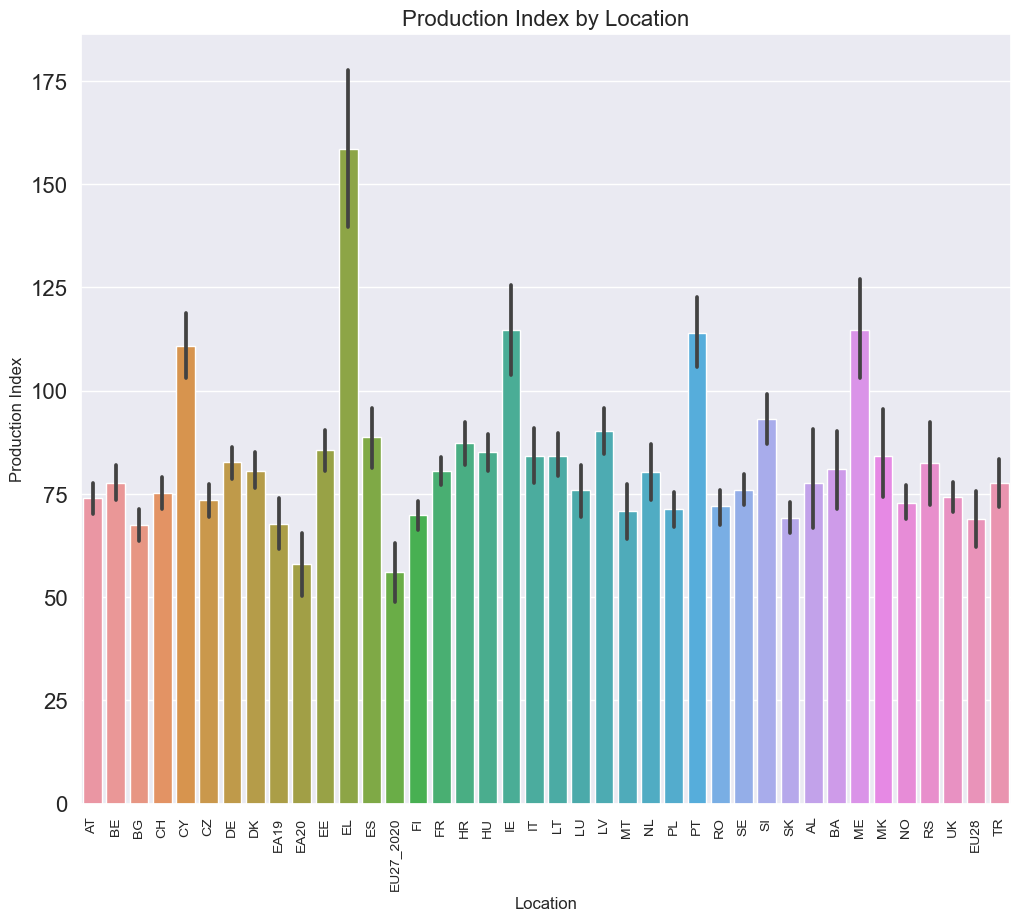

In [187]:
ax= sns.barplot (x='geo\\time', y='Production', data=df2)
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Production Index', fontsize=12)
ax.set_title('Production Index by Location', fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(axis='x', labelsize=10)

## df3 House Construction C.I Ireland 

In [54]:
df3=pd.read_csv("national_house_construction_cost_index_0.csv")

In [55]:
df3.head()

Unnamed: 0 NATIONAL HOUSE CONSTRUCTION COST INDEX Unnamed: 2  \
0  Base: January 1991 = 100                                    NaN        NaN   
1                     Month                                   1994       1995   
2                   January                                  109.2      113.5   
3                  February                                  109.3      114.1   
4                     March                                  109.4      114.1   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1       1996       1997       1998       1999       2000       2001   
2      115.9        118      122.9      126.3      135.8      154.3   
3      115.7      118.5      123.1      126.4      136.1      154.7   
4      115.9      118.8      123.8      126.5      136.4      155.6   

  Unnamed: 9  ... Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0        NaN  ...         NaN         NaN         NaN         NaN         NaN   
1       2002  ...        2007        2008        2009        2010        2011   
2      169.9  ...       198.8       207.4         208       206.9       210.2   
3        170  ...       198.8       208.2       207.3       207.2       210.5   
4      169.5  ...       199.4       208.6       206.8       207.3       200.7   

  Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  
0         NaN         NaN         NaN         NaN         NaN  
1        2012        2013        2014        2015      2016.0  
2       202.5       204.1       204.9       206.2       207.4  
3       202.6       204.2       205.4         206       207.1  
4       202.7       204.3       205.4       206.5         NaN  

[5 rows x 24 columns]

In [56]:
#Setting the first row of the table to column 2.

df3=pd.read_csv("national_house_construction_cost_index_0.csv", header=2)

In [57]:
df3.head()

Month   1994   1995   1996   1997   1998   1999   2000   2001   2002  \
0   January  109.2  113.5  115.9    118  122.9  126.3  135.8  154.3  169.9   
1  February  109.3  114.1  115.7  118.5  123.1  126.4  136.1  154.7    170   
2     March  109.4  114.1  115.9  118.8  123.8  126.5  136.4  155.6  169.5   
3     April  110.3  114.1  115.9  119.8  123.8  130.5  136.5  157.4  169.5   
4       May  110.1  114.1  115.9  119.8  124.5  130.5  136.8  157.6  169.5   

   ...   2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  ...  198.8  207.4    208  206.9  210.2  202.5  204.1  204.9  206.2  207.4  
1  ...  198.8  208.2  207.3  207.2  210.5  202.6  204.2  205.4    206  207.1  
2  ...  199.4  208.6  206.8  207.3  200.7  202.7  204.3  205.4  206.5    NaN  
3  ...    200  208.9  206.5  207.9    201  203.4  204.5  205.6  206.8    NaN  
4  ...  200.1  209.4  206.5  208.7  201.2  203.6  204.5  205.9  207.2    NaN  

[5 rows x 24 columns]

In [59]:
#Melting the df to have year as a column instead of individual columns for each row

df3_new = pd.melt(df3, id_vars='Month', var_name='Year', value_name='Value')

In [60]:
df3_new.head()

Month  Year  Value
0   January  1994  109.2
1  February  1994  109.3
2     March  1994  109.4
3     April  1994  110.3
4       May  1994  110.1

In [232]:
df3_new.shape

(264, 4)

df3_new contains 264 rows and 4 columns.

In [61]:
df3_new.dtypes

Month    object
Year     object
Value    object
dtype: object

In [196]:
df3_transposed = df3.set_index('Month').T

In [63]:
df3_transposed

Month January February  March  April    May   June   July August September  \
1994    109.2    109.3  109.4  110.3  110.1  110.6  110.7  110.9     112.2   
1995    113.5    114.1  114.1  114.1  114.1  114.1  114.5  114.5     115.7   
1996    115.9    115.7  115.9  115.9  115.9    116    116    116     116.9   
1997      118    118.5  118.8  119.8  119.8  119.9  120.8    121     121.5   
1998    122.9    123.1  123.8  123.8  124.5  124.5  125.7  125.7       126   
1999    126.3    126.4  126.5  130.5  130.5  130.5  131.5  131.5     134.1   
2000    135.8    136.1  136.4  136.5  136.8  136.9  137.2  137.2     137.7   
2001    154.3    154.7  155.6  157.4  157.6  157.7  161.1  165.9       166   
2002    169.9      170  169.5  169.5  169.5  169.7  173.8  173.9     173.9   
2003    174.2    174.5  174.5  177.3  177.3  177.4  177.1  177.2     177.2   
2004    179.6    179.7  179.9  179.9    180  180.2  181.1  182.2     182.2   
2005    184.7    184.8  184.9  186.5  186.6  186.6  186.7  186.9     186.9   
2006    189.9    190.1  190.6    194  194.2  194.3  194.4  194.5     194.6   
2007    198.8    198.8  199.4    200  200.1  200.3  203.7  203.6     203.7   
2008    207.4    208.2  208.6  208.9  209.4  209.9  210.4  210.4     210.5   
2009      208    207.3  206.8  206.5  206.5    206    206    206     206.1   
2010    206.9    207.2  207.3  207.9  208.7  208.6  209.4  209.6     209.5   
2011    210.2    210.5  200.7    201  201.2  201.4  201.5  201.9     202.1   
2012    202.5    202.6  202.7  203.4  203.6  203.6  204.1  204.1     203.7   
2013    204.1    204.2  204.3  204.5  204.5  204.8  204.8    205     205.1   
2014    204.9    205.4  205.4  205.6  205.9    206    206  206.6     206.4   
2015    206.2      206  206.5  206.8  207.2  207.6  207.4  207.4     207.3   
2016    207.4    207.1    NaN    NaN    NaN    NaN    NaN    NaN       NaN   

Month October November December Yearly average % Increase on previous year  
1994    112.7    112.9    113.1            111                       3.40%  
1995    115.8    115.9    115.9          114.7                       3.30%  
1996    117.1    117.2    117.2          116.3                       1.40%  
1997      122    122.6    122.6          120.4                       3.50%  
1998    126.2    126.2    126.1          124.9                       3.70%  
1999    134.7    134.8    134.9            131                       4.90%  
2000    153.8    153.8    153.9            141                       7.60%  
2001    169.3    169.4    169.3          161.5                      14.50%  
2002    173.9      174    174.1          171.8                       6.40%  
2003    177.2    177.2    177.2          176.5                       2.70%  
2004    183.9    184.2    184.2          181.5                       2.80%  
2005    189.5    189.4    189.7          186.9                       3.00%  
2006    197.7      198    198.1          194.2                       3.90%  
2007    203.8    203.8    204.2          201.7                       3.90%  
2008    210.1    209.9    209.3          209.4                       3.80%  
2009    206.2    206.2    206.2          206.5                      -1.40%  
2010    209.5    209.5    209.8          208.7                       1.10%  
2011      202    202.2    202.3          203.1                      -2.70%  
2012    203.8      204    204.2          203.5                       0.20%  
2013    205.4    205.4    204.7          204.7                       0.60%  
2014    206.7    206.5    206.2            206                       0.60%  
2015    207.2    207.6    207.4          207.1                       0.50%  
2016      NaN      NaN      NaN            NaN                         NaN

In [64]:
#Number of NaN values for 2016. Data only present for January. Drop the row.

df3_transposed=df3_transposed.drop(["2016"], axis=0)

In [65]:
#Reset the index

df3_transposed.reset_index(inplace=True)

In [66]:
df3_new = df3_transposed.iloc[:,: -2]

# Use the melt function to reshape the DataFrame
df3_new = pd.melt(df3_transposed, id_vars='index', var_name='Month', value_name='Value', value_vars=df3_transposed.columns[:-2])

# Rename the columns
df3_new.rename(columns={'index': 'Year'}, inplace=True)

# Sort the DataFrame by Year and Month
df3_new.sort_values(['Year', 'Month'], inplace=True)

In [67]:
df3_new

Year      Month  Value
66   1994      April  110.3
154  1994     August  110.9
242  1994   December  113.1
22   1994   February  109.3
0    1994    January  109.2
..    ...        ...    ...
65   2015      March  206.5
109  2015        May  207.2
241  2015   November  207.6
219  2015    October  207.2
197  2015  September  207.3

[264 rows x 3 columns]

In [68]:
#Adding column 'statistic label' as this will be needed when merging with df4.  
df3_new['Statistic Label'] = 'House Construction Cost Index'

#Renaming the 'Value' column to 'VALUE' for merging also.
df3_new.rename(columns={'Value':'VALUE'}, inplace=True)

In [69]:
#Altered df3 that will be used for the merge with df4. 
df3_new

Year      Month  VALUE                Statistic Label
66   1994      April  110.3  House Construction Cost Index
154  1994     August  110.9  House Construction Cost Index
242  1994   December  113.1  House Construction Cost Index
22   1994   February  109.3  House Construction Cost Index
0    1994    January  109.2  House Construction Cost Index
..    ...        ...    ...                            ...
65   2015      March  206.5  House Construction Cost Index
109  2015        May  207.2  House Construction Cost Index
241  2015   November  207.6  House Construction Cost Index
219  2015    October  207.2  House Construction Cost Index
197  2015  September  207.3  House Construction Cost Index

[264 rows x 4 columns]

## df4 Residential Property Price Index Ireland 

In [70]:
df4=pd.read_csv("Residential_Prop_Price_Index.csv")

In [71]:
df4.head()

Statistic Label         Month  \
0  Residential Property Price Index  2005 January   
1  Residential Property Price Index  2005 January   
2  Residential Property Price Index  2005 January   
3  Residential Property Price Index  2005 January   
4  Residential Property Price Index  2005 January   

            Type of Residential Property           UNIT  VALUE  
0  National - all residential properties  Base 2015=100  124.9  
1                      National - houses  Base 2015=100  120.7  
2                  National - apartments  Base 2015=100  153.4  
3    Dublin - all residential properties  Base 2015=100  118.5  
4                        Dublin - houses  Base 2015=100  112.0

Just want the values for National. Do not want the individual areas as results in unnecessary complication.

In [233]:
df4.shape

(654, 6)

In [72]:
#Renaming the column

df4=df4.rename(columns={"Type of Residential Property": "Type_of_Residential_Property"})

In [73]:
# Only keep rows that do not contain any of the strings in 'National-'
keep = ["National -"]

# .strip() removes whitespace
df4 = df4[df4['Type_of_Residential_Property'].str.strip().str.contains('|'.join(keep))]

Ref - https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/

In [74]:
df4.head()

Statistic Label          Month  \
0   Residential Property Price Index   2005 January   
1   Residential Property Price Index   2005 January   
2   Residential Property Price Index   2005 January   
20  Residential Property Price Index  2005 February   
21  Residential Property Price Index  2005 February   

             Type_of_Residential_Property           UNIT  VALUE  
0   National - all residential properties  Base 2015=100  124.9  
1                       National - houses  Base 2015=100  120.7  
2                   National - apartments  Base 2015=100  153.4  
20  National - all residential properties  Base 2015=100  125.9  
21                      National - houses  Base 2015=100  121.8

In [75]:
#looking at the variables within the statistic label column
df4label = df4.groupby(by=['Statistic Label']).size()
print(df4label)

Statistic Label
Percentage Change over 1 month for Residential Property Price Index      654
Percentage Change over 12 months for Residential Property Price Index    654
Percentage Change over 3 months for Residential Property Price Index     654
Residential Property Price Index                                         654
dtype: int64


Only interested in the Residential Property Price Index for the purpose of this analyis. 

In [76]:
#Dropping all values that are not 'Residential Property Price Index' values. Inpalce=True to permenantly alter the df. 
df4.drop(df4[df4['Statistic Label'] != 'Residential Property Price Index'].index, inplace=True)

In [77]:
df4.dtypes

Statistic Label                  object
Month                            object
Type_of_Residential_Property     object
UNIT                             object
VALUE                           float64
dtype: object

In [78]:
#Seperating out the month from the year in 'Month' column by creating a new df 'date'

date = df4['Month'].str.split(pat = ' ', n = 1, expand = True)

In [79]:
#Columns currently called 0 and 1, need to rename.
date = date.rename(columns={' 0': 'Year', ' 1': 'Month'})

In [80]:
date

0         1
0     2005   January
1     2005   January
2     2005   January
20    2005  February
21    2005  February
...    ...       ...
4321  2023   January
4322  2023   January
4340  2023  February
4341  2023  February
4342  2023  February

[654 rows x 2 columns]

In [81]:
#Dropping the existing date column 'Month' as we now have the two seperate columns for month and year.
df4= df4.drop('Month', axis=1)

In [82]:
#Specifying the location where the columns will be in the df.
df4.insert(loc = 3, column = 'Year', value = date[0])

df4.insert(loc = 4, column = 'Month', value = date[1])

In [83]:
df4.columns

Index(['Statistic Label', 'Type_of_Residential_Property', 'UNIT', 'Year',
       'Month', 'VALUE'],
      dtype='object')

In [84]:
df4.head()

Statistic Label           Type_of_Residential_Property  \
0   Residential Property Price Index  National - all residential properties   
1   Residential Property Price Index                      National - houses   
2   Residential Property Price Index                  National - apartments   
20  Residential Property Price Index  National - all residential properties   
21  Residential Property Price Index                      National - houses   

             UNIT  Year     Month  VALUE  
0   Base 2015=100  2005   January  124.9  
1   Base 2015=100  2005   January  120.7  
2   Base 2015=100  2005   January  153.4  
20  Base 2015=100  2005  February  125.9  
21  Base 2015=100  2005  February  121.8

## df3 & df4 Combined

In [85]:
# Using pd.concat to join the two dfs together.
combined = pd.concat([df3_new,df4])

In [86]:
combined.head()

Year     Month  VALUE                Statistic Label  \
66   1994     April  110.3  House Construction Cost Index   
154  1994    August  110.9  House Construction Cost Index   
242  1994  December  113.1  House Construction Cost Index   
22   1994  February  109.3  House Construction Cost Index   
0    1994   January  109.2  House Construction Cost Index   

    Type_of_Residential_Property UNIT  
66                           NaN  NaN  
154                          NaN  NaN  
242                          NaN  NaN  
22                           NaN  NaN  
0                            NaN  NaN

In [87]:
#As this is not a common column for both dfs we can drop.
combined=combined.drop(['Type_of_Residential_Property','UNIT'], axis =1)

In [234]:
combined.shape

(918, 4)

In [88]:
combined.dtypes

Year               object
Month              object
VALUE              object
Statistic Label    object
dtype: object

In [89]:
#Columns VALUE and Year are now objects. Need to convert to numerical. 
combined[["VALUE","Year"]] = combined[["VALUE","Year"]].apply(lambda x:pd.to_numeric(x, errors='coerce'))

The VALUE column should be of type float, the year column should be of type int. To avoid having to specify both individually, pd.to_numeric was used. This meant the one line converted the dtypes appropriately.

In [90]:
combined.dtypes

Year                 int64
Month               object
VALUE              float64
Statistic Label     object
dtype: object

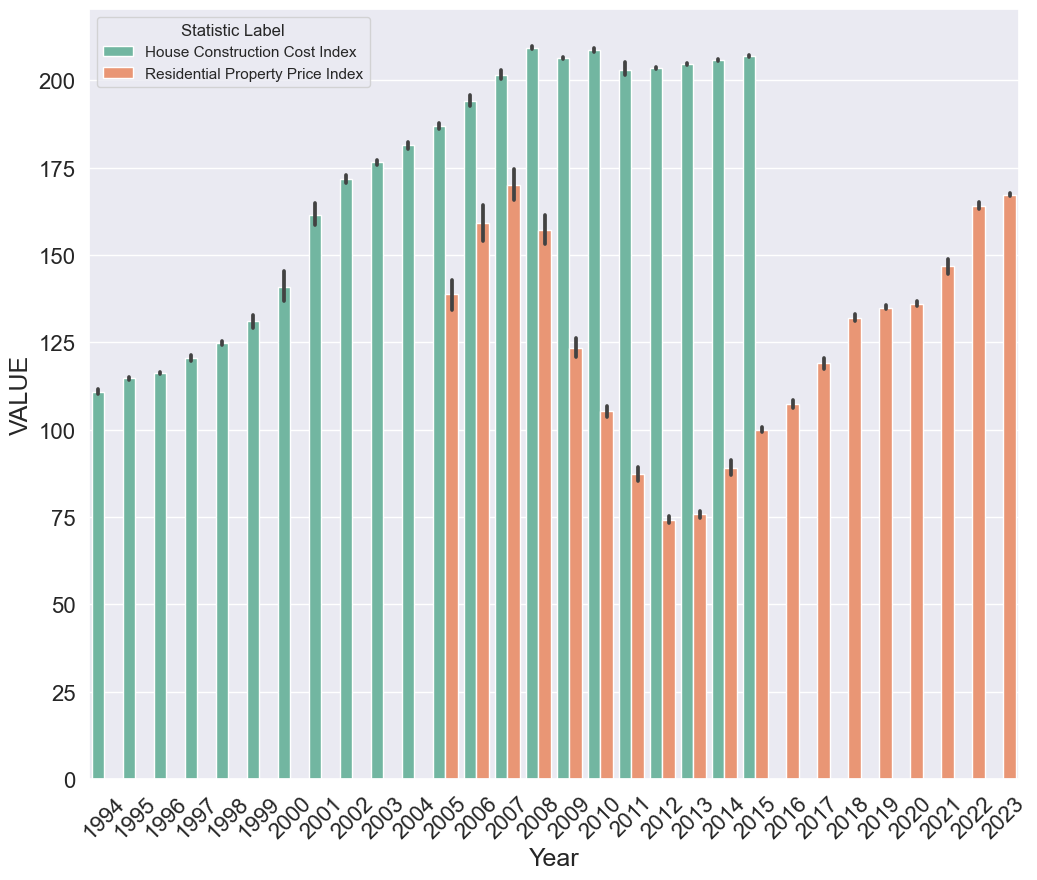

In [91]:
#Set the color pallete.
sns.set_palette("Set2")

#Plot both sets of data based on the 'Statistic Label'
sns.barplot(data=combined, x='Year', y='VALUE', hue='Statistic Label')
sns.set(rc={'figure.figsize':(12,10),'axes.labelsize': 18,'xtick.labelsize': 16, 'ytick.labelsize': 16})
#Rotate the labels to make them readable.
plt.xticks(rotation=45);

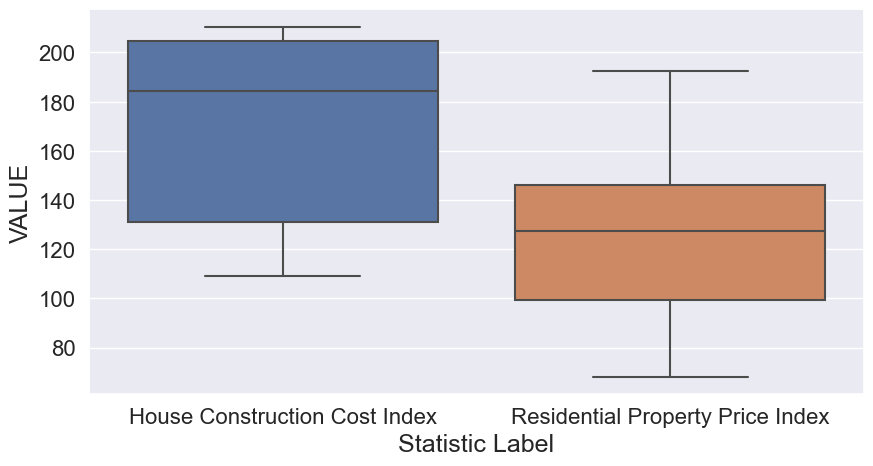

In [92]:
#Create box plot based on statistic label.
plt.figure(figsize=(10,5))  
sns.boxplot(x='Statistic Label', y='VALUE',data=combined)
plt.show()

### Combining df3 and df4 using pd.merge.

In [93]:
#Create a new df based on merging df3 and df4
#Merge is done based on the year/month columns
merged = pd.merge(df3_new,df4, on=["Year","Month"], how="left")

In [94]:
merged

Year      Month VALUE_x              Statistic Label_x  \
0    1994      April   110.3  House Construction Cost Index   
1    1994     August   110.9  House Construction Cost Index   
2    1994   December   113.1  House Construction Cost Index   
3    1994   February   109.3  House Construction Cost Index   
4    1994    January   109.2  House Construction Cost Index   
..    ...        ...     ...                            ...   
523  2015    October   207.2  House Construction Cost Index   
524  2015    October   207.2  House Construction Cost Index   
525  2015  September   207.3  House Construction Cost Index   
526  2015  September   207.3  House Construction Cost Index   
527  2015  September   207.3  House Construction Cost Index   

                    Statistic Label_y           Type_of_Residential_Property  \
0                                 NaN                                    NaN   
1                                 NaN                                    NaN   
2                                 NaN                                    NaN   
3                                 NaN                                    NaN   
4                                 NaN                                    NaN   
..                                ...                                    ...   
523  Residential Property Price Index                      National - houses   
524  Residential Property Price Index                  National - apartments   
525  Residential Property Price Index  National - all residential properties   
526  Residential Property Price Index                      National - houses   
527  Residential Property Price Index                  National - apartments   

              UNIT  VALUE_y  
0              NaN      NaN  
1              NaN      NaN  
2              NaN      NaN  
3              NaN      NaN  
4              NaN      NaN  
..             ...      ...  
523  Base 2015=100    103.2  
524  Base 2015=100    103.3  
525  Base 2015=100    102.4  
526  Base 2015=100    102.2  
527  Base 2015=100    101.6  

[528 rows x 8 columns]

In [95]:
#Renaming columns to show what they represent.
merged = merged.rename(columns={'VALUE_x': 'Construction_Cost_Index', 'VALUE_y': 'Property_Price_Index'})

#Removing columns that are no longer required.
merged = merged.drop(['Statistic Label_x', 'UNIT', 'Statistic Label_y', 'Type_of_Residential_Property'], axis=1)

In [235]:
merged.shape

(528, 5)

In [96]:
#converting year to int and construction_cost_index to float using pd.to_numeric.
merged[["Year","Construction_Cost_Index"]]=merged[["Year","Construction_Cost_Index"]].apply(pd.to_numeric)

In [97]:
merged.head()

Year     Month  Construction_Cost_Index  Property_Price_Index
0  1994     April                    110.3                   NaN
1  1994    August                    110.9                   NaN
2  1994  December                    113.1                   NaN
3  1994  February                    109.3                   NaN
4  1994   January                    109.2                   NaN

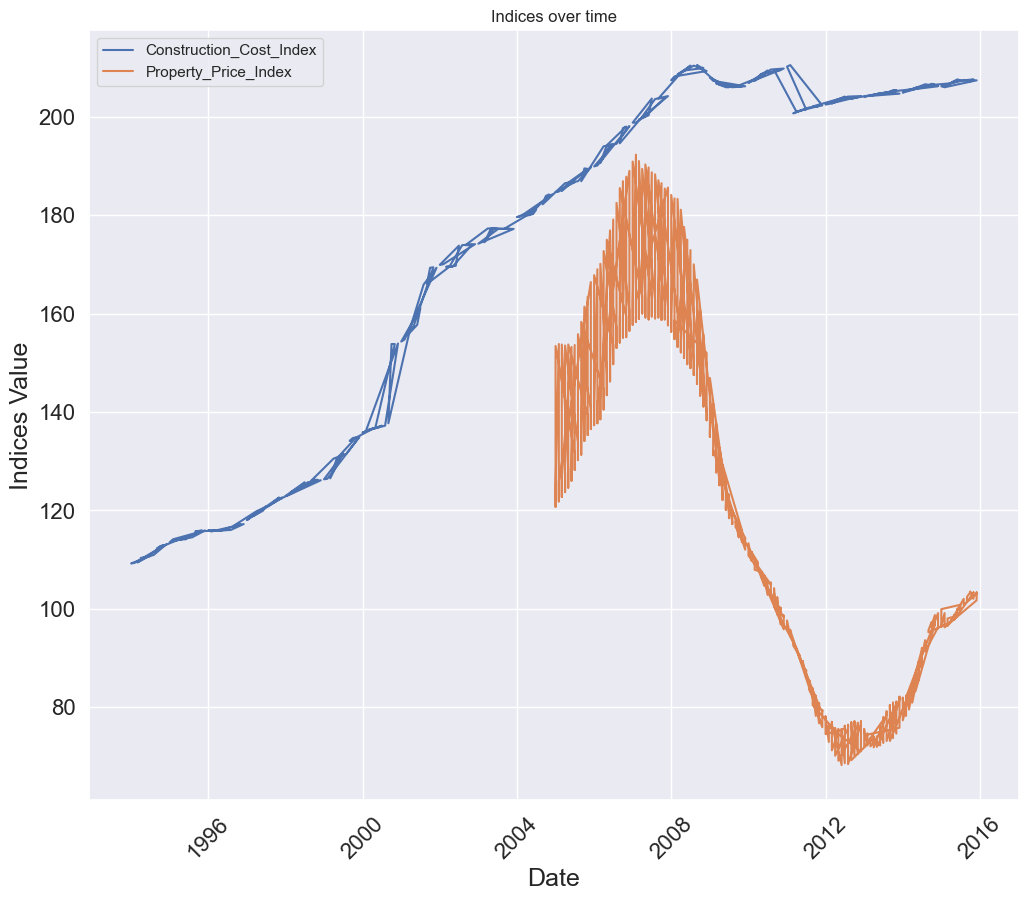

In [98]:
#For the purpose of visualisation, want the year and month to show as date times.
merged['Date'] = pd.to_datetime(merged['Year'].astype(str) + '-' + merged['Month'], format='%Y-%B')

# Plotting the index data against the datetime column using plt
plt.plot(merged['Date'], merged['Construction_Cost_Index'], label='Construction_Cost_Index')
plt.plot(merged['Date'], merged['Property_Price_Index'], label='Property_Price_Index')

plt.xlabel('Date')
plt.ylabel('Indices Value')
plt.title('Indices over time')
plt.legend()
plt.xticks(rotation=45);

Although similar, the plt.plot showed the results more effectively than the sns.lineplot. The sns.lineplot showed a line with a shade around it where as the plt.plot showed stronger color and more distinct values.

In [100]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     528 non-null    int64         
 1   Month                    528 non-null    object        
 2   Construction_Cost_Index  528 non-null    float64       
 3   Property_Price_Index     396 non-null    float64       
 4   Date                     528 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.8+ KB


In [101]:
#Get the correlation of the merged df.
corr = merged.corr()

<AxesSubplot:>

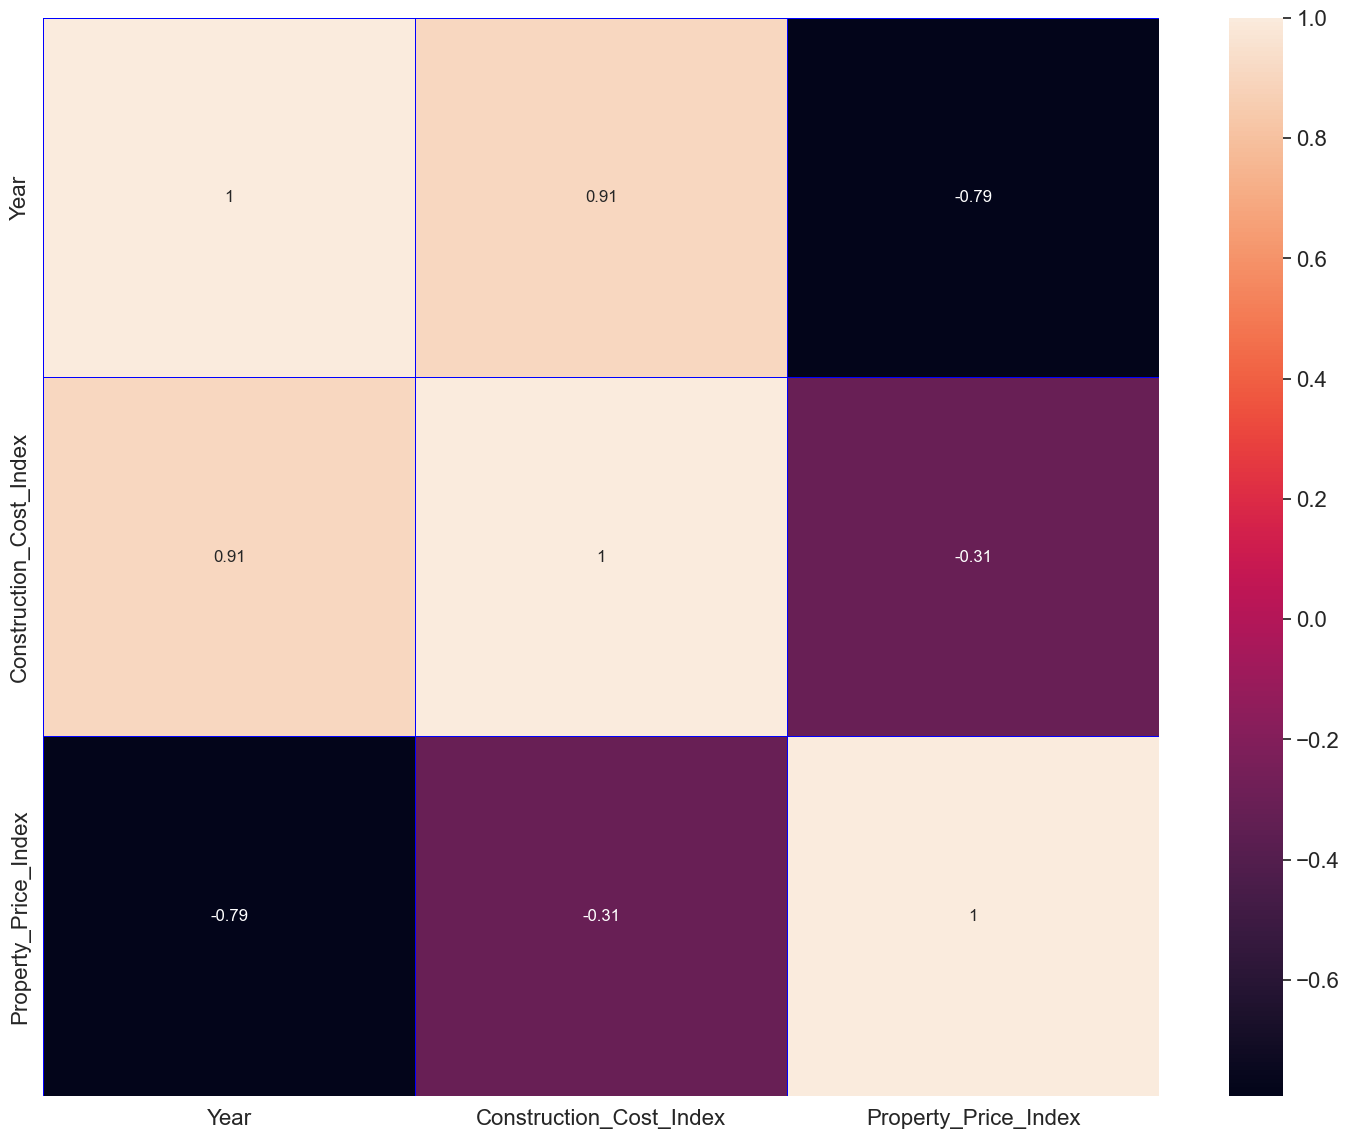

In [102]:
#creating a heatmap to demonstrate the correlation between variables.
plt.figure(figsize=(18,14))
sns.heatmap(corr,annot=True,linecolor="blue",lw=0.5)

The heatmap shows a strong negative correlation between year and property price index, a weak negative correlation between property price index and construction cost index and a strong positive correlation between construction cost index and year. 

In [103]:
#Determine the number of null values for each column
merged.isnull().sum()

Year                         0
Month                        0
Construction_Cost_Index      0
Property_Price_Index       132
Date                         0
dtype: int64

<AxesSubplot:>

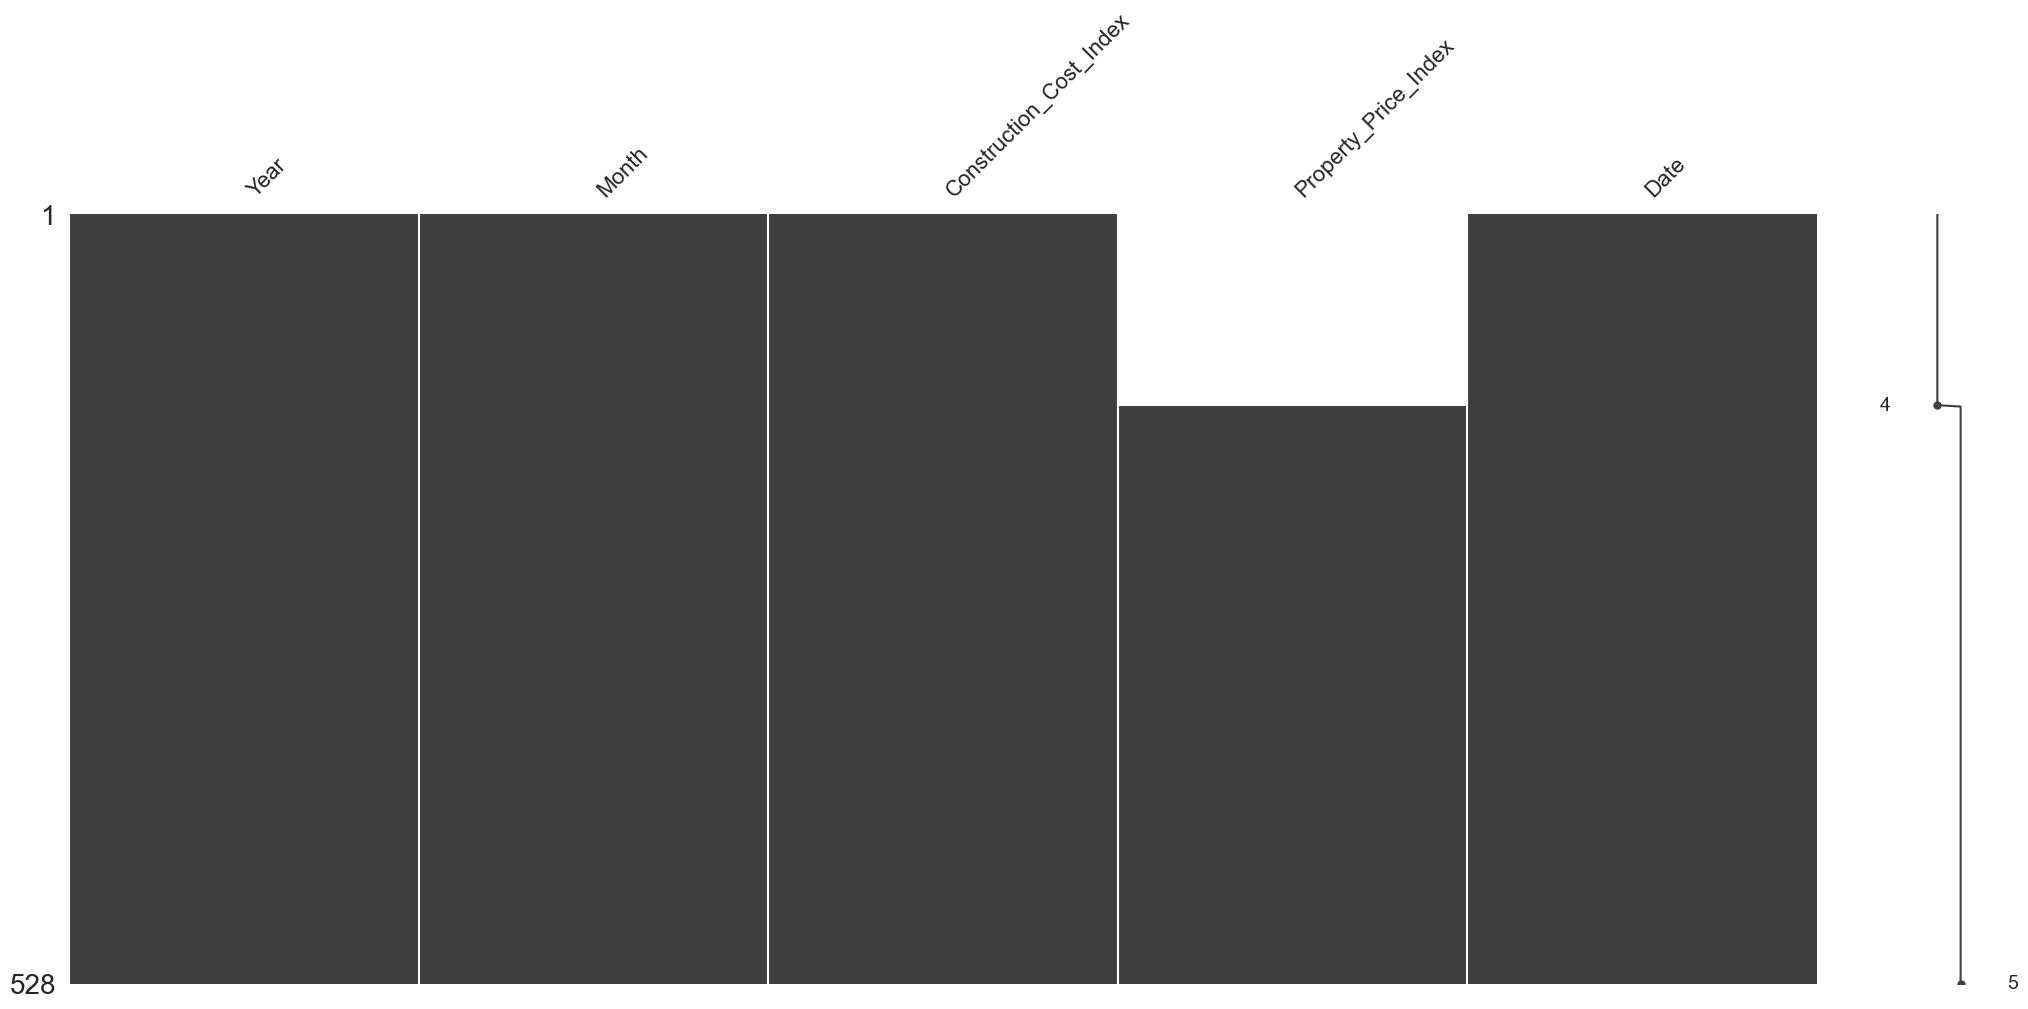

In [104]:
#Vizualisation of the null values.
msno.matrix(merged)

There is 132 null values present for Property price index.

## df5 Construction Indices 

In [200]:
df5=pd.read_csv("download1061915290288055378.csv")

In [201]:
df5.head()

FeatureCode  DateCode Measurement  Units  Value     Construction indices
0   K02000001  2011 Feb       Costs    NaN  103.1              New Housing
1   K02000001  2011 Feb       Costs    NaN  104.4                 All work
2   K02000001  2011 Feb       Costs    NaN  105.0           Other new work
3   K02000001  2011 Feb       Costs    NaN  103.7  Repairs and maintenance
4   K02000001  2016 Aug       Costs    NaN  110.1              New Housing

In [202]:
df5.describe(include = 'O')

FeatureCode  DateCode Measurement Construction indices
count          493       493         493                  493
unique           1       181           1                    5
top      K02000001  2011 Feb       Costs          New Housing
freq           493         4         493                  104

As the feature code contains one unique value it does not add value. Measurement also contains one unique value. Units appears to be NaN for all rows. Therefore we can say that these columns are not relevant.

In [107]:
#Dropping irrelevant columns. 
df5 = df5.drop(["FeatureCode","Measurement","Units"], axis=1)

In [108]:
df5.head()

DateCode  Value     Construction indices
0  2011 Feb  103.1              New Housing
1  2011 Feb  104.4                 All work
2  2011 Feb  105.0           Other new work
3  2011 Feb  103.7  Repairs and maintenance
4  2016 Aug  110.1              New Housing

In [109]:
df5.dtypes

DateCode                 object
Value                   float64
Construction indices     object
dtype: object

In [110]:
df5.sort_values(by=["DateCode"], inplace=True)

In [203]:
df5.head()

FeatureCode  DateCode Measurement  Units  Value     Construction indices
0   K02000001  2011 Feb       Costs    NaN  103.1              New Housing
1   K02000001  2011 Feb       Costs    NaN  104.4                 All work
2   K02000001  2011 Feb       Costs    NaN  105.0           Other new work
3   K02000001  2011 Feb       Costs    NaN  103.7  Repairs and maintenance
4   K02000001  2016 Aug       Costs    NaN  110.1              New Housing

In [112]:
#Dropping index of hourly wage from the df.
df5.drop(df5[df5['Construction indices'] == 'Index of hourly wage costs'].index, inplace=True)

In [114]:
#Converting the datecode column to datetime format with year and month.
df5['DateCode'] = pd.to_datetime(df5['DateCode'])
df5['DateCode'] = df5['DateCode'].dt.strftime('%Y-%m')

In [204]:
df5.head()

FeatureCode  DateCode Measurement  Units  Value     Construction indices
0   K02000001  2011 Feb       Costs    NaN  103.1              New Housing
1   K02000001  2011 Feb       Costs    NaN  104.4                 All work
2   K02000001  2011 Feb       Costs    NaN  105.0           Other new work
3   K02000001  2011 Feb       Costs    NaN  103.7  Repairs and maintenance
4   K02000001  2016 Aug       Costs    NaN  110.1              New Housing

In [116]:
#using pivot to restructure the df and create seperate columns for each construction index
df5_pivot = df5.pivot(index='DateCode', columns='Construction indices', values='Value')

In [117]:
#Reset index
df5_pivot = df5_pivot.reset_index()

In [205]:
df5_pivot.head()

Construction indices DateCode  All work  New Housing  Other new work  \
0                     2010-11     101.7        102.3           101.3   
1                     2010-12     101.4        102.0           101.3   
2                     2011-01     103.1        102.2           103.5   
3                     2011-02     104.4        103.1           105.0   
4                     2011-03     105.6        103.7           106.5   

Construction indices  Repairs and maintenance  
0                                       102.5  
1                                       102.2  
2                                       102.6  
3                                       103.7  
4                                       104.4

In [206]:
import plotly.express as px
fig = px.line(df5_pivot, x="DateCode", y=["All work", "New Housing","Other new work", "Repairs and maintenance"], template = 'plotly_dark')
fig.show()

A line plot was created using plotly.express. This gives a much better visualisation that of a basic sns.scatterplot as it can be difficult to see the differences between the variables. The pattern of the data is far more distinct with the line plot. The line plot also allows the user to determine a value at a specific value with the hover.

## df6 Index of Employment in Construction 

In [208]:
df6=pd.read_csv("BBA02.20230428105548.csv")

In [209]:
df6.head()

STATISTIC                                    Statistic Label C02196V02652  \
0     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
1     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
2     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
3     BBA02  Annual Average Index of Employment (1975 - Dat...            -   
4     BBA02  Annual Average Index of Employment (1975 - Dat...            -   

   State  TLIST(A1)  Year           UNIT  VALUE  
0  State       1975  1975  Base 2000=100  133.2  
1  State       1976  1976  Base 2000=100  128.1  
2  State       1977  1977  Base 2000=100  134.8  
3  State       1978  1978  Base 2000=100  147.0  
4  State       1979  1979  Base 2000=100  158.8

In [210]:
df6.describe(include = 'O')

STATISTIC                                    Statistic Label  \
count         34                                                 34   
unique         1                                                  1   
top        BBA02  Annual Average Index of Employment (1975 - Dat...   
freq          34                                                 34   

       C02196V02652  State           UNIT  
count            34     34             34  
unique            1      1              1  
top               -  State  Base 2000=100  
freq             34     34             34

Columns STATISTIC, Statistic label, C02196V02652, state and UNIT all contain one unique value. These columns can therefore be dropped from the dataframe as they are not adding value to the analysis.

In [211]:
#dropping columns 
df6 = df6.drop(["C02196V02652","TLIST(A1)","UNIT", "STATISTIC", "State"], axis=1)

In [212]:
df6.head()

Statistic Label  Year  VALUE
0  Annual Average Index of Employment (1975 - Dat...  1975  133.2
1  Annual Average Index of Employment (1975 - Dat...  1976  128.1
2  Annual Average Index of Employment (1975 - Dat...  1977  134.8
3  Annual Average Index of Employment (1975 - Dat...  1978  147.0
4  Annual Average Index of Employment (1975 - Dat...  1979  158.8

In [125]:
df6.dtypes

Statistic Label     object
Year                 int64
VALUE              float64
dtype: object

Data types for each column are appropriate.

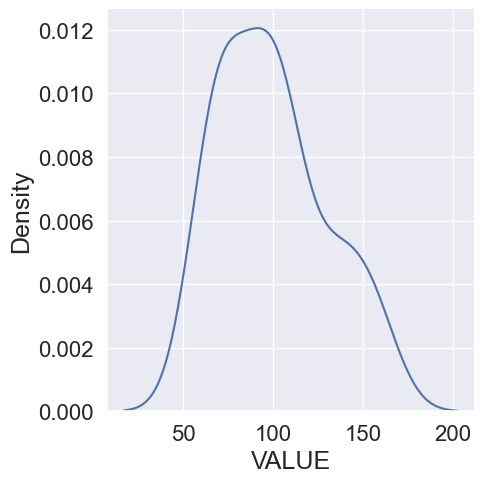

In [218]:
sns.displot(data=df6, x="VALUE", kind="kde")

Data in df6 follows a normal distribution.

In [222]:
fig = px.line(df6, x="Year", y=["VALUE"], template = 'plotly_white')
fig.show()

A line plot was chosen to demonstrate the data as a the data looked very sparse on the scatter plot so was difficult to see the pattern of the data.

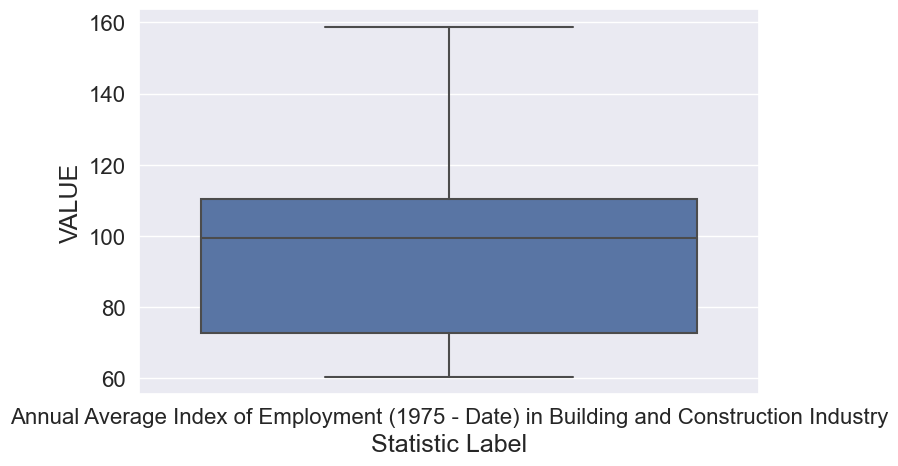

In [127]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Statistic Label', y='VALUE',data=df6)
plt.show()

No outliers present. Large range of data indicated by the whiskers of the plot.

## df7 Labour Input Europe 

In [224]:
#reverts to the tab - file is .tsv#
df7=pd.read_csv("Labourinput_Europe.tsv",sep="\t|,", engine='python')

In [225]:
df7.head()

indic_bt nace_r2 s_adj unit geo\time 2022  2021  2020  2019  2018   ...  \
0     EMPL       F   NSA  I10       AL    :     :     :     :     :   ...   
1     EMPL       F   NSA  I10       AT    :     :     :     :     :   ...   
2     EMPL       F   NSA  I10       BE    :     :     :     :     :   ...   
3     EMPL       F   NSA  I10       BG    :     :     :     :     :   ...   
4     EMPL       F   NSA  I10       CH    :     :     :     :     :   ...   

    1999    1998    1997    1996  1995  1994  1993  1992  1991  1990  
0      :       :       :       :     :     :     :     :     :     :  
1  104.8   109.5   101.1   102.1     :     :     :     :     :     :  
2      :       :       :       :     :     :     :     :     :     :  
3      :       :       :       :     :     :     :     :     :     :  
4   88.0    89.1       :       :     :     :     :     :     :     :  

[5 rows x 38 columns]

In [226]:
df7.describe(include = 'O')

indic_bt nace_r2 s_adj unit geo\time 2022  2021  2020  2019  2018   \
count       483     483   483  483      483   483   483   483   483   483   
unique        3       1     2    3       40   238   245   250   256   242   
top        WAGE       F   NSA  I15       IT    :     :     :     :     :    
freq        183     483   299  189       13   191   191   156   143   143   

        ... 1999  1998  1997  1996  1995  1994  1993  1992  1991  1990  
count   ...   483   483   483   483   483   483   483   483   483  483  
unique  ...    71    60    44    35    17     4     4     4     4    3  
top     ...    :     :     :     :     :     :     :     :     :     :  
freq    ...   393   404   420   432   457   480   480   480   480  481  

[4 rows x 38 columns]

In [130]:
#Drop the columns
df7=df7.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

It was decided to drop the above columnns as there was no key given as to what these variables meant. 

In [131]:
df7.head()

unit geo\time 2022  2021  2020  2019  2018     2017     2016    2015   ...  \
0  I10       AL    :     :     :     :     :        :    123.0   115.8   ...   
1  I10       AT    :     :     :     :     :   103.3 p   101.0   100.9   ...   
2  I10       BE    :     :     :     :     :        :   101.9 p  100.2   ...   
3  I10       BG    :     :     :     :     :    70.3 p   71.4 p  74.9 p  ...   
4  I10       CH    :     :     :     :     :    103.5    103.9   105.1   ...   

    1999    1998    1997    1996  1995  1994  1993  1992  1991  1990  
0      :       :       :       :     :     :     :     :     :     :  
1  104.8   109.5   101.1   102.1     :     :     :     :     :     :  
2      :       :       :       :     :     :     :     :     :     :  
3      :       :       :       :     :     :     :     :     :     :  
4   88.0    89.1       :       :     :     :     :     :     :     :  

[5 rows x 35 columns]

In [132]:
#Rearrange the df using the .melt function.
df7m=df7.melt(id_vars=["geo\\time", "unit"], 
        var_name="Year", 
        value_name="Labour Input")

In [227]:
#Looking at the number of unique values for the labour input column. 
df7m['Labour Input'].nunique()

1543

In [134]:
df7m.head(50)

geo\time unit   Year Labour Input
0        AL  I10  2022            : 
1        AT  I10  2022            : 
2        BE  I10  2022            : 
3        BG  I10  2022            : 
4        CH  I10  2022            : 
5        CY  I10  2022            : 
6        CZ  I10  2022            : 
7        DE  I10  2022            : 
8        DK  I10  2022            : 
9      EA19  I10  2022            : 
10       EE  I10  2022            : 
11       EL  I10  2022            : 
12       ES  I10  2022            : 
13     EU28  I10  2022            : 
14       FI  I10  2022            : 
15       FR  I10  2022            : 
16       HR  I10  2022            : 
17       HU  I10  2022            : 
18       IE  I10  2022            : 
19       IS  I10  2022            : 
20       IT  I10  2022            : 
21       LT  I10  2022            : 
22       LU  I10  2022            : 
23       LV  I10  2022            : 
24       ME  I10  2022            : 
25       MK  I10  2022            : 
26       MT  I10  2022            : 
27       NL  I10  2022            : 
28       NO  I10  2022            : 
29       PL  I10  2022            : 
30       PT  I10  2022            : 
31       RO  I10  2022            : 
32       RS  I10  2022            : 
33       SE  I10  2022            : 
34       SI  I10  2022            : 
35       SK  I10  2022            : 
36       TR  I10  2022            : 
37       UK  I10  2022            : 
38       AL  I15  2022        126.8 
39       AT  I15  2022        122.2 
40       BE  I15  2022           : c
41       BG  I15  2022        90.2 p
42       CH  I15  2022       105.8 e
43       CY  I15  2022        168.6 
44       CZ  I15  2022         96.7 
45       DE  I15  2022       111.5 p
46       DK  I15  2022       126.8 p
47     EA19  I15  2022        114.9 
48     EA20  I15  2022        115.0 
49       EE  I15  2022        121.1

We can see the first 37 columns have a value of ':'. Other columns have values containing ':c', 'p' and 'e'. These are keys given in the df. 'e' represents estimated. 

In [135]:
#Renaming column 'geo\\time' to country. 
df7m = df7m.rename(columns={'geo\\time': 'Country'})

In [136]:
import numpy as np

#Need to remove all white space to address the keys contained within the values.
df7m= df7m.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df7m = df7m.replace(':', np.nan)

Replaced all ':' values with NaN as they are techincally blank. Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [137]:
df7m.head(50)

Country unit  Year Labour Input
0       AL  I10  2022          NaN
1       AT  I10  2022          NaN
2       BE  I10  2022          NaN
3       BG  I10  2022          NaN
4       CH  I10  2022          NaN
5       CY  I10  2022          NaN
6       CZ  I10  2022          NaN
7       DE  I10  2022          NaN
8       DK  I10  2022          NaN
9     EA19  I10  2022          NaN
10      EE  I10  2022          NaN
11      EL  I10  2022          NaN
12      ES  I10  2022          NaN
13    EU28  I10  2022          NaN
14      FI  I10  2022          NaN
15      FR  I10  2022          NaN
16      HR  I10  2022          NaN
17      HU  I10  2022          NaN
18      IE  I10  2022          NaN
19      IS  I10  2022          NaN
20      IT  I10  2022          NaN
21      LT  I10  2022          NaN
22      LU  I10  2022          NaN
23      LV  I10  2022          NaN
24      ME  I10  2022          NaN
25      MK  I10  2022          NaN
26      MT  I10  2022          NaN
27      NL  I10  2022          NaN
28      NO  I10  2022          NaN
29      PL  I10  2022          NaN
30      PT  I10  2022          NaN
31      RO  I10  2022          NaN
32      RS  I10  2022          NaN
33      SE  I10  2022          NaN
34      SI  I10  2022          NaN
35      SK  I10  2022          NaN
36      TR  I10  2022          NaN
37      UK  I10  2022          NaN
38      AL  I15  2022        126.8
39      AT  I15  2022        122.2
40      BE  I15  2022          : c
41      BG  I15  2022       90.2 p
42      CH  I15  2022      105.8 e
43      CY  I15  2022        168.6
44      CZ  I15  2022         96.7
45      DE  I15  2022      111.5 p
46      DK  I15  2022      126.8 p
47    EA19  I15  2022        114.9
48    EA20  I15  2022        115.0
49      EE  I15  2022        121.1

In [138]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
df7m["Labour Input"] = df7m["Labour Input"].str.replace('[^0-9.]+', '', regex=True)

Removed the keys which appeared alongside numerical values using str.replace to remove the letters. Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [228]:
#checking the data types of each column.
df7m.dtypes

Country          object
unit             object
Year             object
Labour Input    float64
CountryName      object
dtype: object

In [140]:
df7m['Labour Input'] = df7m['Labour Input'].replace('', np.nan)
df7m.dropna(subset=['Labour Input'], inplace=True)

In [141]:
df7m.head()

Country unit  Year Labour Input
38      AL  I15  2022        126.8
39      AT  I15  2022        122.2
41      BG  I15  2022         90.2
42      CH  I15  2022        105.8
43      CY  I15  2022        168.6

In [142]:
#Converting Labour Input to float data type.
df7m['Labour Input'] = df7m['Labour Input'].astype(float)

In [144]:
#choropleth does not work with apha 2 codes.
#need to change the codes to alpha 3

# Using pycountry package, create a dictionary named 'codes' listing all alpha codes.
codes = {c.alpha_2: c.alpha_3 for c in pycountry.countries}

names = {c.alpha_3: c.name for c in pycountry.countries}

# map the alpha 2 codes to alpha 3 for df7m
df7m["Country"] = df7m["Country"].map(codes)

#to allow country names to show when hovering
df7m["CountryName"] = df7m["Country"].map(names)

In [145]:
codes

{'AW': 'ABW',
 'AF': 'AFG',
 'AO': 'AGO',
 'AI': 'AIA',
 'AX': 'ALA',
 'AL': 'ALB',
 'AD': 'AND',
 'AE': 'ARE',
 'AR': 'ARG',
 'AM': 'ARM',
 'AS': 'ASM',
 'AQ': 'ATA',
 'TF': 'ATF',
 'AG': 'ATG',
 'AU': 'AUS',
 'AT': 'AUT',
 'AZ': 'AZE',
 'BI': 'BDI',
 'BE': 'BEL',
 'BJ': 'BEN',
 'BQ': 'BES',
 'BF': 'BFA',
 'BD': 'BGD',
 'BG': 'BGR',
 'BH': 'BHR',
 'BS': 'BHS',
 'BA': 'BIH',
 'BL': 'BLM',
 'BY': 'BLR',
 'BZ': 'BLZ',
 'BM': 'BMU',
 'BO': 'BOL',
 'BR': 'BRA',
 'BB': 'BRB',
 'BN': 'BRN',
 'BT': 'BTN',
 'BV': 'BVT',
 'BW': 'BWA',
 'CF': 'CAF',
 'CA': 'CAN',
 'CC': 'CCK',
 'CH': 'CHE',
 'CL': 'CHL',
 'CN': 'CHN',
 'CI': 'CIV',
 'CM': 'CMR',
 'CD': 'COD',
 'CG': 'COG',
 'CK': 'COK',
 'CO': 'COL',
 'KM': 'COM',
 'CV': 'CPV',
 'CR': 'CRI',
 'CU': 'CUB',
 'CW': 'CUW',
 'CX': 'CXR',
 'KY': 'CYM',
 'CY': 'CYP',
 'CZ': 'CZE',
 'DE': 'DEU',
 'DJ': 'DJI',
 'DM': 'DMA',
 'DK': 'DNK',
 'DO': 'DOM',
 'DZ': 'DZA',
 'EC': 'ECU',
 'EG': 'EGY',
 'ER': 'ERI',
 'EH': 'ESH',
 'ES': 'ESP',
 'EE': 'EST',
 'ET':

In [146]:
fig=px.choropleth(df7m,
                  locations="Country",
                  color="Labour Input",
                  hover_name="CountryName",
                  animation_frame="Year",
                  color_continuous_scale=px.colors.sequential.Rainbow,
                  )

fig.update_layout(
title_text="Labour Input Europe",
geo_scope='europe',
geo = dict(projection={"type":"natural earth"}))

fig.show()

## Global construction empoyment numbers in thousand persons.

In [229]:
df10 = pd.read_csv("Global_Con_Employment.csv")

In [230]:
df10.head()

LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY  TIME     Value Flag Codes
0      AUS  EMPINDUS  CONSTR  THND_PER         A  2018  1178.354        NaN
1      AUS  EMPINDUS  CONSTR  THND_PER         A  2019  1173.967        NaN
2      AUS  EMPINDUS  CONSTR  THND_PER         A  2020  1173.959        NaN
3      AUS  EMPINDUS  CONSTR  THND_PER         A  2021  1149.426        NaN
4      AUS  EMPINDUS  CONSTR  THND_PER         A  2022  1231.692        NaN

In [166]:
## Indicator, subject and frequency contain the same values for all rows. 
##Flag codes column contains all NaNs so is of no value. Drop these rows.

df10=df10.drop(["INDICATOR","SUBJECT", "FREQUENCY", "Flag Codes"], axis=1)

In [167]:
df10

LOCATION   MEASURE  TIME      Value
0        AUS  THND_PER  2018  1178.3540
1        AUS  THND_PER  2019  1173.9670
2        AUS  THND_PER  2020  1173.9590
3        AUS  THND_PER  2021  1149.4260
4        AUS  THND_PER  2022  1231.6920
..       ...       ...   ...        ...
212      CRI  THND_PER  2018   146.5352
213      CRI  THND_PER  2019   149.5847
214      CRI  THND_PER  2020   127.1860
215      CRI  THND_PER  2021   128.8290
216      CRI  THND_PER  2022   140.4693

[217 rows x 4 columns]

In [168]:
#To look at the non numeric columns, include="all".
#This shows the unit of measure is the same for each row. There is 44 unique locations included.

df10.describe(include="all")

LOCATION   MEASURE         TIME         Value
count       217       217   217.000000    217.000000
unique       44         1          NaN           NaN
top         AUS  THND_PER          NaN           NaN
freq          5       217          NaN           NaN
mean        NaN       NaN  2019.981567   3280.497363
std         NaN       NaN     1.414093   7878.679459
min         NaN       NaN  2018.000000     12.350000
25%         NaN       NaN  2019.000000    194.883300
50%         NaN       NaN  2020.000000    396.650000
75%         NaN       NaN  2021.000000   1846.000000
max         NaN       NaN  2022.000000  45861.610000

In [169]:
import matplotlib.pyplot as plt

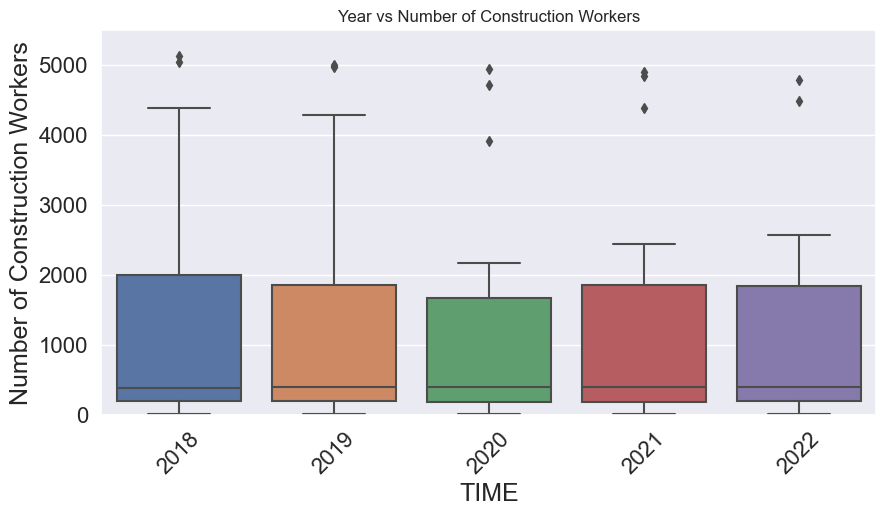

In [170]:
# Using seaborn to create a box plot.
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='TIME', y='Value', data=df10, ax=ax).set(title='Year vs Number of Construction Workers')

ax.set_ylabel('Number of Construction Workers')

# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# specifying the y-axis limits
ax.set_ylim(0, 5500)

plt.show()

Can see the presence of outliers for all years.

In [171]:
mean = df10['Value'].mean()

print(mean)

3280.4973631336416


In [172]:
median = df10['Value'].median()

print(median)

396.65


mean > median therefore the data should be positively skewed when plotted.

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Value', ylabel='Density'>

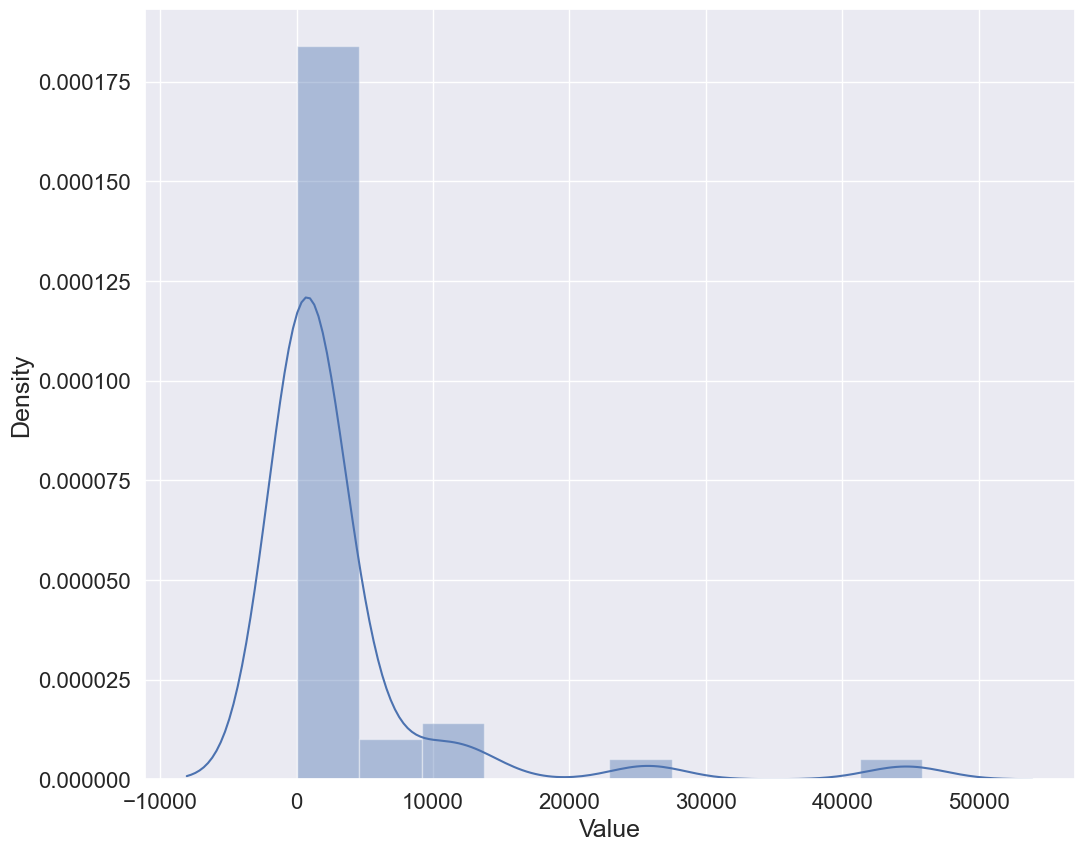

In [173]:
data = df10['Value']

sns.distplot(data, bins=10, hist=True, kde=True, label = 'No. of Construction Workers (Thousands)')

Data is normal. Can conclude the number of construction workers is heavily positively skewed.
Ref - https://gist.github.com/pb111/512c840affb32593d28573fbb764045b

In [174]:
fig=px.choropleth(df10,
                  locations="LOCATION",
                  color="Value",
                  hover_name="LOCATION",
                  animation_frame="TIME",
                  color_continuous_scale=px.colors.sequential.Plasma,
                  )

fig.update_layout(
title_text="Global Construction Employment",
geo = dict(projection={"type":"natural earth"}))

fig.show()